# Gender Recognition by Voice

## Importing Data

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5)

data = pd.read_csv('data/cleaned/voice_data.csv')
X_train = pd.read_csv('data/cleaned/X_train.csv')
y_train = pd.read_csv('data/cleaned/y_train.csv')
X_test = pd.read_csv('data/cleaned/X_test.csv')
y_test = pd.read_csv('data/cleaned/y_test.csv')

In [30]:
data.head()

meanfreq    median       Q25       Q75       IQR        sd  log_skew  \
0 -4.049248 -4.224901 -2.576102 -5.693607 -0.214778  0.427355  2.925892   
1 -3.841053 -3.999293 -2.486885 -5.588987 -0.258485  0.611669  4.032721   
2 -3.463066 -4.095851 -2.706986 -3.928699  0.909326  1.603848  4.675089   
3 -0.992157 -0.759454 -0.901418 -0.711205  0.632690  0.899998 -0.927599   
4 -1.530640 -1.676948 -1.268395 -0.792029  1.005588  1.322561 -1.055855   

   log_kurt    sp.ent       sfm      mode   meanfun  log_minfun  exp_maxfun  \
0  3.177486 -0.039083  0.471575 -2.141210 -1.812038   -1.384486    0.636793   
1  4.022523 -0.065236  0.594431 -2.141210 -1.079594   -1.369352   -0.524133   
2  4.506253 -1.083730  0.398261 -2.141210 -1.365368   -1.390131    0.404082   
3 -0.837709  1.516383  1.797340 -1.054576 -1.666966   -1.143909   -0.524133   
4 -0.807635  1.708336  2.114740 -0.790514 -1.127233   -1.239725    0.189238   

    modindx   meandom    mindom    maxdom   dfrange label  
0 -1.454772 -1.564205 -0.708404 -1.431422 -1.419137  male  
1 -1.014103 -1.561916 -0.708404 -1.418107 -1.405818  male  
2 -1.065344 -1.563866 -0.708404 -1.429203 -1.416917  male  
3  0.614286 -1.195367 -0.708404 -1.273867 -1.261532  male  
4  0.289046 -0.221660 -0.708404  0.124154  0.136933  male

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meanfreq    3168 non-null   float64
 1   median      3168 non-null   float64
 2   Q25         3168 non-null   float64
 3   Q75         3168 non-null   float64
 4   IQR         3168 non-null   float64
 5   sd          3168 non-null   float64
 6   log_skew    3168 non-null   float64
 7   log_kurt    3168 non-null   float64
 8   sp.ent      3168 non-null   float64
 9   sfm         3168 non-null   float64
 10  mode        3168 non-null   float64
 11  meanfun     3168 non-null   float64
 12  log_minfun  3168 non-null   float64
 13  exp_maxfun  3168 non-null   float64
 14  modindx     3168 non-null   float64
 15  meandom     3168 non-null   float64
 16  mindom      3168 non-null   float64
 17  maxdom      3168 non-null   float64
 18  dfrange     3168 non-null   float64
 19  label       3168 non-null  

The meaning of the features are as follows:

* `meanfreq`: mean frequency (in kHz)
* `median`: median frequency (in kHz)
* `Q25`: first quantile (in kHz)
* `Q75`: third quantile (in kHz)
* `IQR`: inter-quantile range (in kHz)
* `sd`: standard deviation of frequency
* `log_skew`: skewness after logarithmic transformation
* `log_kurt`: kurtosis after logarithmic transformation
* `sp.ent`: spectral entropy
* `sfm`: spectral flatness
* `mode`: mode frequency
* `log_meanfun`: average of fundamental frequency measured across acoustic signal
* `log_minfun`: minimum fundamental frequency measured across acoustic signal after logarithmic transformation
* `exp_maxfun`: maximum fundamental frequency measured across acoustic signal after exponential transformation
* `modindx`: modulation index
* `meandom`: average of dominant frequency measured across acoustic signal
* `mindom`: minimum of dominant frequency measured across acoustic signal
* `maxdom`: maximum of dominant frequency measured across acoustic signal
* `dfrange`: range of dominant frequency measured across acoustic signal
* `label`: male or female

## Baseline Model: Classification Tree

In the lecture, we have seen that a classification tree is a good model to start with. We will use the same model here.

We try to use a classification tree with depth 4.

### Training the Model

We will use the `DecisionTreeClassifier` from `sklearn.tree` to train a classification tree. We will use the default parameters for now.


In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Evaluating the Model

Firstly, we will use the `score` method to see the accuracy of the model on the training set.

In [33]:
classification_tree_train_accuracy = tree.score(X_train, y_train)
print("Training set accuracy: {:.2f}".format(classification_tree_train_accuracy))

Training set accuracy: 1.00


Then we will use the `score` method to see the accuracy of the model on the test set.

In [34]:
classification_tree_test_accuracy = tree.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(classification_tree_test_accuracy))

Test set accuracy: 0.96


We try to see the confusion matrix of the model.

<Axes: >

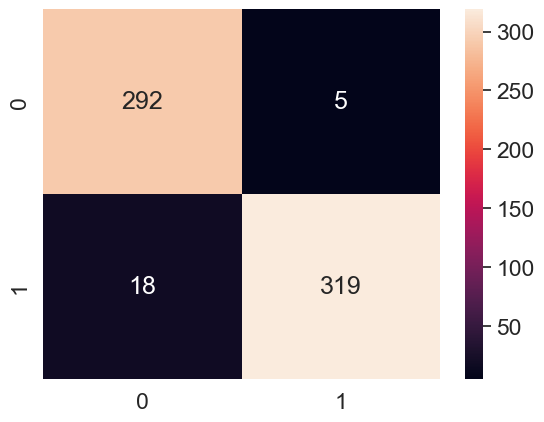

In [35]:
from sklearn.metrics import confusion_matrix

y_prediction = tree.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [36]:
TN, FP, FN, TP = confusion_matrix(y_test, y_prediction).ravel()
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
print("True Positive Rate: {:.2f}".format(TPR))
print("True Negative Rate: {:.2f}".format(TNR))
print("False Positive Rate: {:.2f}".format(FPR))
print("False Negative Rate: {:.2f}".format(FNR))

True Positive Rate: 0.95
True Negative Rate: 0.98
False Positive Rate: 0.02
False Negative Rate: 0.05


### Visualizing and Analyzing the Model

Then we try to draw the tree using `sklearn.tree.plot_tree`.

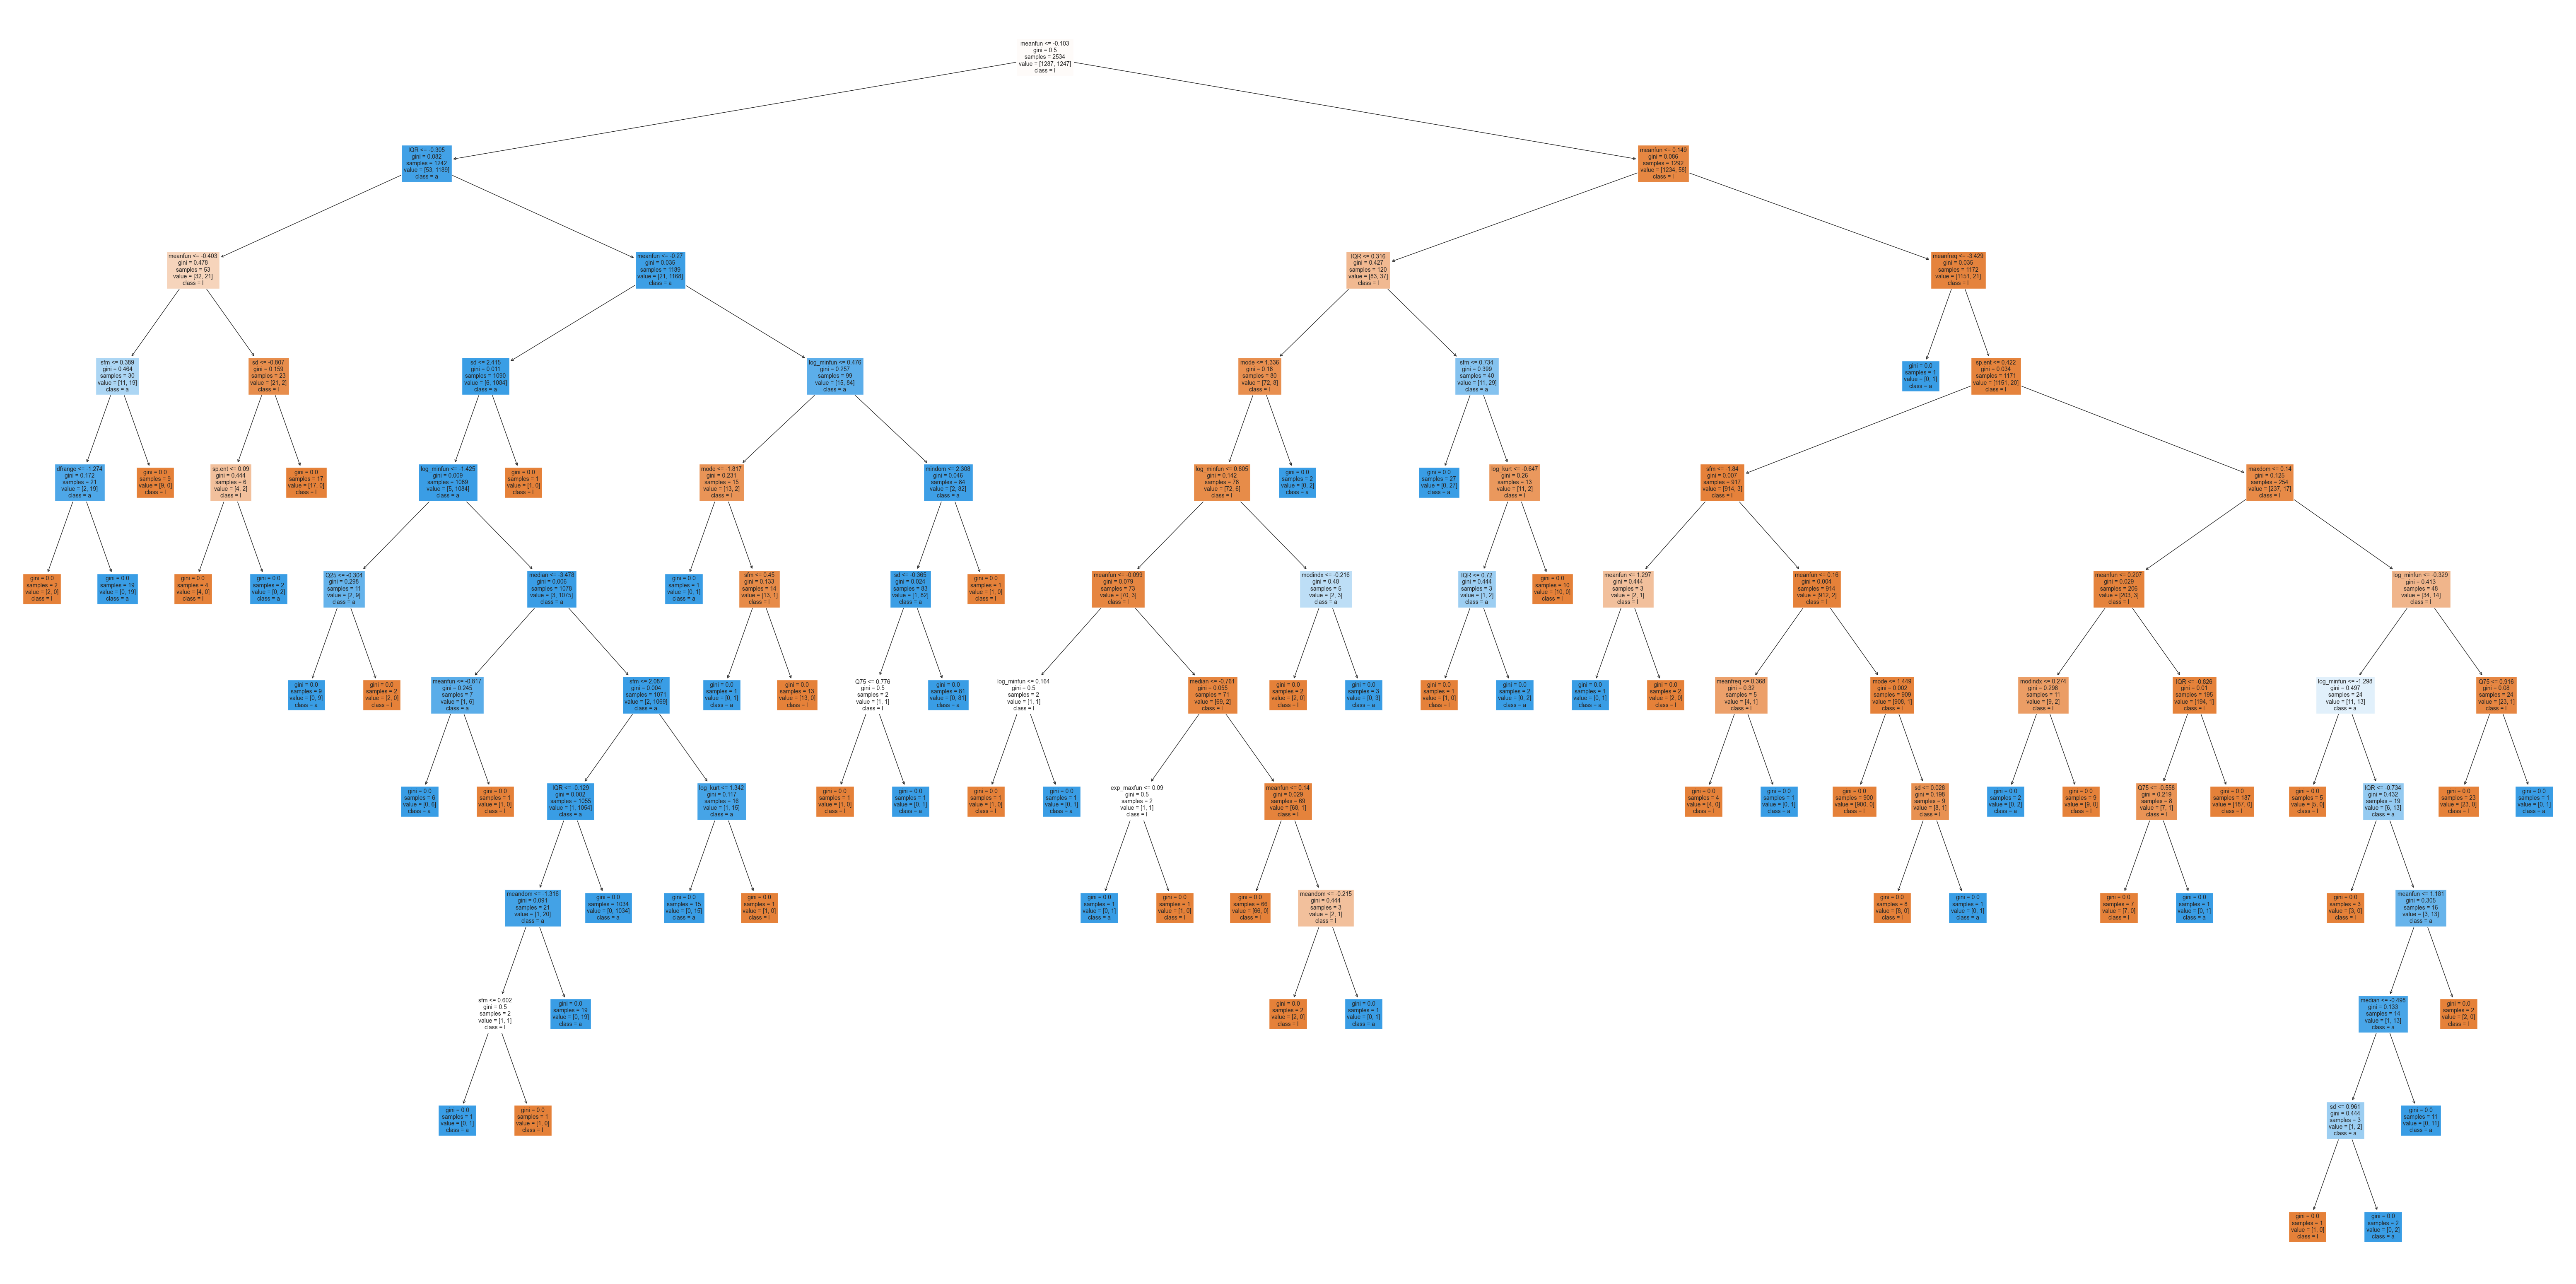

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 40))
plot_tree(tree, class_names="label", feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

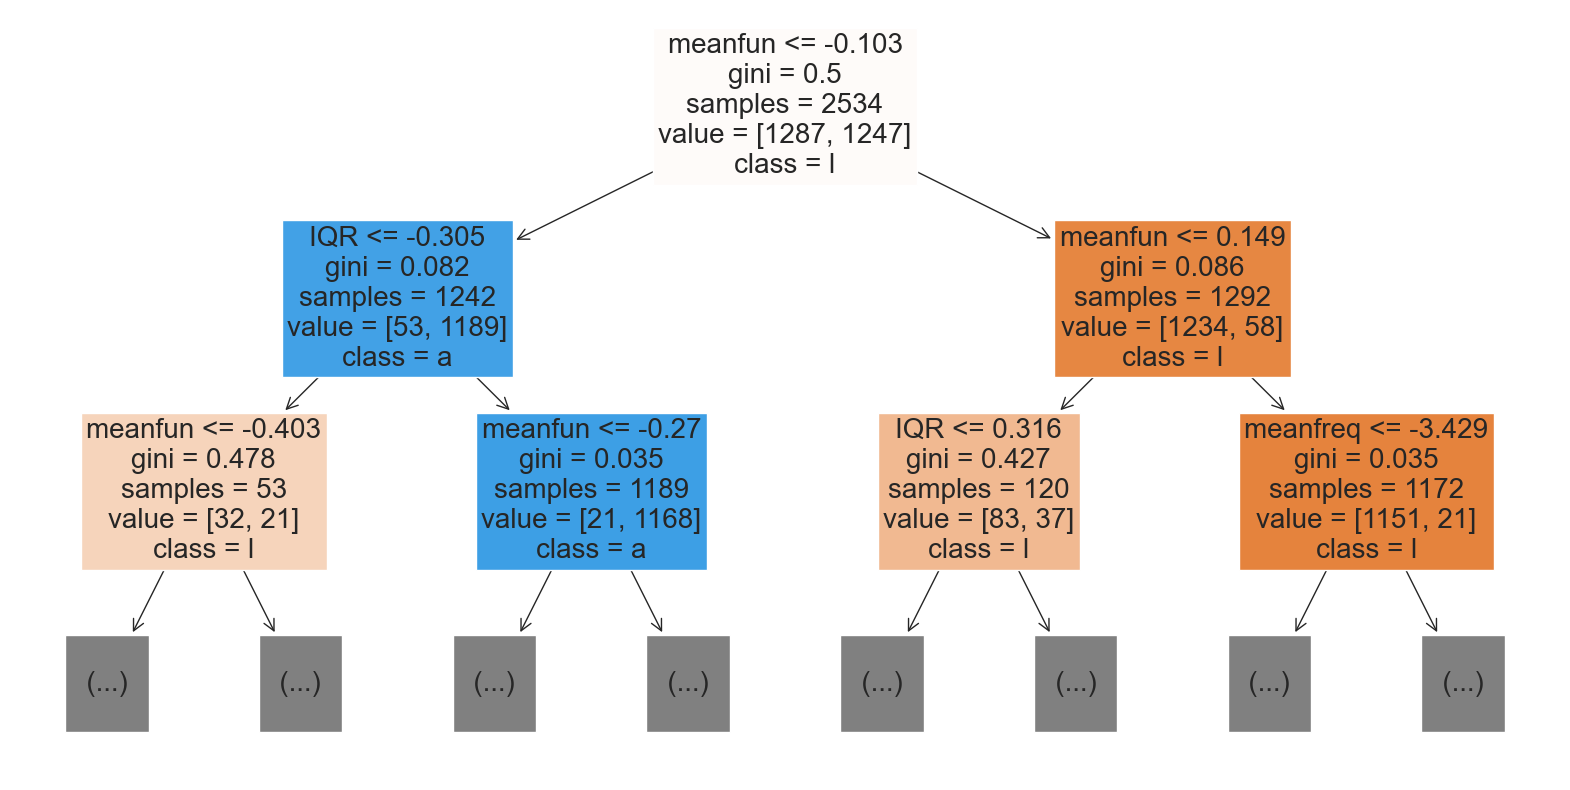

In [38]:
plt.figure(figsize=(20, 10))
plot_tree(tree, class_names="label", feature_names=X_train.columns, filled=True, fontsize=20, max_depth=2)
plt.show()

From the tree, we can see that the most important feature is `meanfun`. The second most important feature is `IQR`.

Then, we try to plot the data with the two most important features.

<Axes: xlabel='meanfun', ylabel='IQR'>

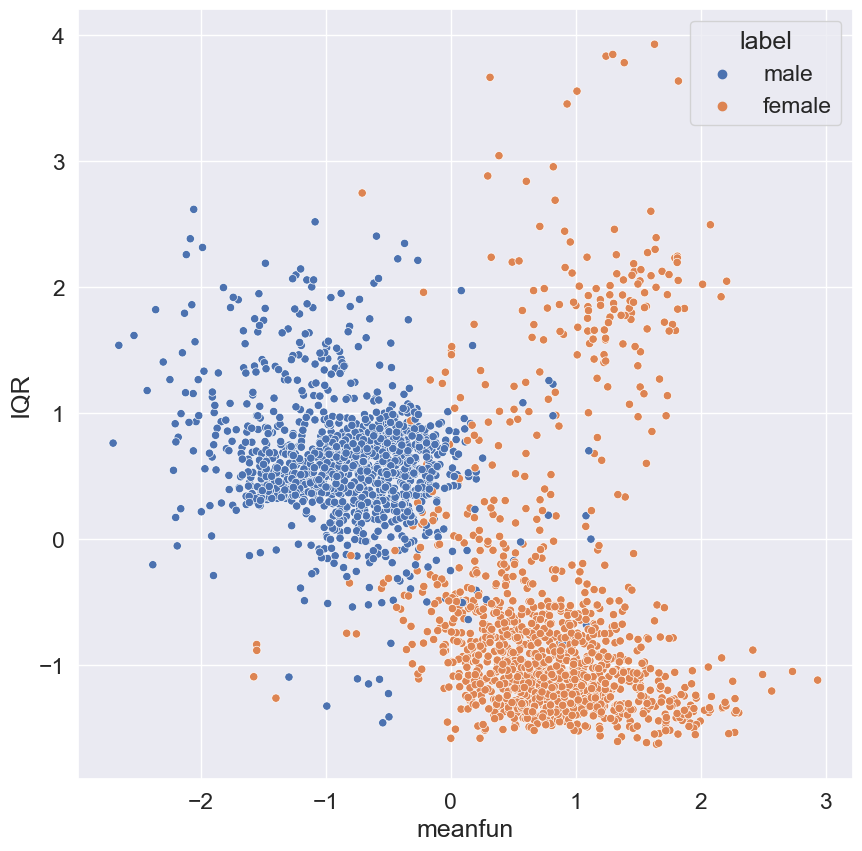

In [39]:
X_train_important = X_train[["meanfun", "IQR"]]
plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_train_important, x="meanfun", y="IQR", hue=y_train["label"])

## Extracting Important Features

In order to explore more models, we will firstly use the two most important features only. Which makes the model simpler and easier to interpret.

In [40]:
X_train_important = X_train[["meanfun", "IQR"]]
X_test_important = X_test[["meanfun", "IQR"]]

## Logistic Regression

In logistic regression, we try to use regression to predict the probability of the label, which is $p(y=\mathtt{male}\mid X=X_i)$.

The general form of logistic regression is as follows:
$$
\begin{align}
\hat{p}(y=k\mid X=x) &= \frac{e^{\beta_{k0}+\beta_{k}^T x}}{1+\sum_{l=1}^{K-1} e^{\beta_{l0}+\beta_{l}^T x}} , &k=1,\cdots,K-1\\
\hat{p}(y=K\mid X=x) &= \frac{1}{1+\sum_{l=1}^{K-1} e^{\beta_{l0}+\beta_{l}^T x}}
\end{align}
$$

Since we only have two classes, we can simplify the model to:
$$
\hat{p}(y=\mathtt{male}\mid X=x) = \frac{e^{\beta_0+\beta^T x}}{1+e^{\beta_0+\beta^T x}}=\frac{1}{1+e^{-(\beta_0+\sum_{i=1}^n \beta_i x_i)}}
$$

Firstly, for ease of interpretation, we will use only one feature, which is `meanfun`.

beta_0: -0.26
beta_1: -5.54
Training set accuracy: 0.96
Test set accuracy: 0.95
True Positive Rate: 0.95
True Negative Rate: 0.95
False Positive Rate: 0.05
False Negative Rate: 0.05
Training set accuracy: 0.96
Test set accuracy: 0.95


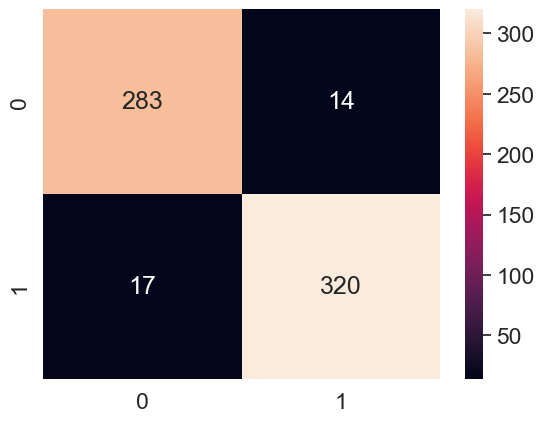

In [41]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=87).fit(X_train_important[["meanfun"]], y_train.squeeze())
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
print("beta_1: {:.2f}".format(logreg.coef_[0][0]))
print("Training set accuracy: {:.2f}".format(logreg.score(X_train_important[["meanfun"]], y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(logreg.score(X_test_important[["meanfun"]], y_test)))
sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test_important[["meanfun"]])), annot=True, fmt="d")

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test_important[["meanfun"]])).ravel()
TPR_logreg_1 = TP / (TP + FN)
TNR_logreg_1 = TN / (TN + FP)
FPR_logreg_1 = FP / (FP + TN)
FNR_logreg_1 = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_logreg_1))
print("True Negative Rate: {:.2f}".format(TNR_logreg_1))
print("False Positive Rate: {:.2f}".format(FPR_logreg_1))
print("False Negative Rate: {:.2f}".format(FNR_logreg_1))

logreg_1_train_accuracy = logreg.score(X_train_important[["meanfun"]], y_train.squeeze())
logreg_1_test_accuracy = logreg.score(X_test_important[["meanfun"]], y_test.squeeze())

print("Training set accuracy: {:.2f}".format(logreg_1_train_accuracy))
print("Test set accuracy: {:.2f}".format(logreg_1_test_accuracy))

We try to plot the regression line of the model.

<Axes: xlabel='meanfun', ylabel='label'>

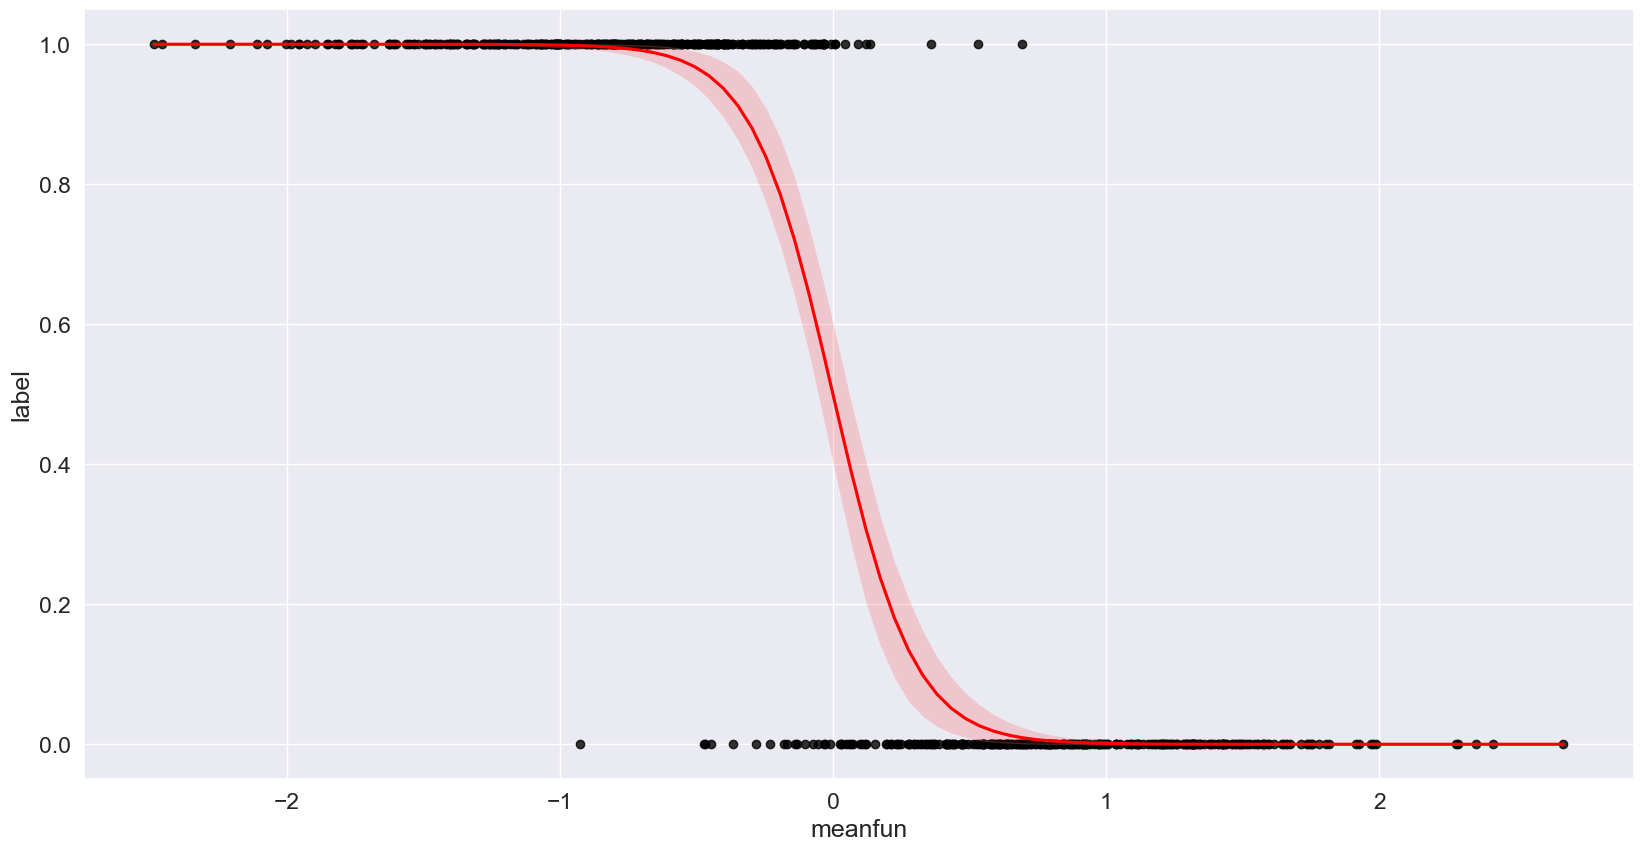

In [42]:
x_plot = X_test_important[["meanfun"]]
y_plot = y_test["label"] == "male"
plt.figure(figsize=(20, 10))
sns.regplot(x=x_plot, y=y_plot, logistic=True, scatter_kws={"color": "black"}, line_kws={"color": "red"})

We try to use the two most important features.

beta_0: -0.42
beta_1: -4.98
beta_2: 1.43
Training set accuracy: 0.96
Test set accuracy: 0.98
True Positive Rate: 0.98
True Negative Rate: 0.97
False Positive Rate: 0.03
False Negative Rate: 0.02


<Axes: >

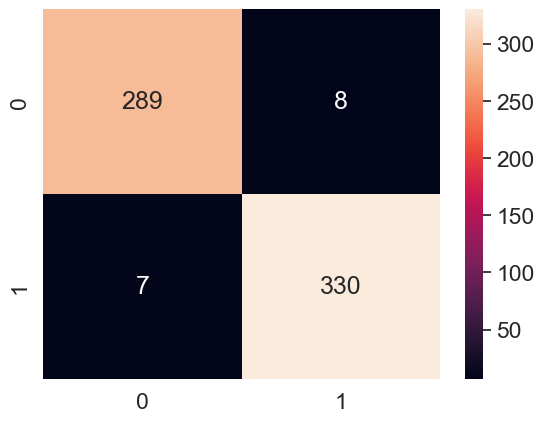

In [43]:
logreg = LogisticRegression(random_state=87).fit(X_train_important, y_train.squeeze())
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
print("beta_1: {:.2f}".format(logreg.coef_[0][0]))
print("beta_2: {:.2f}".format(logreg.coef_[0][1]))
print("Training set accuracy: {:.2f}".format(logreg.score(X_train_important, y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(logreg.score(X_test_important, y_test)))

logreg_2_train_accuracy = logreg.score(X_train_important, y_train.squeeze())
logreg_2_test_accuracy = logreg.score(X_test_important, y_test.squeeze())

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test_important)).ravel()
TPR_logreg_2 = TP / (TP + FN)
TNR_logreg_2 = TN / (TN + FP)
FPR_logreg_2 = FP / (FP + TN)
FNR_logreg_2 = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_logreg_2))
print("True Negative Rate: {:.2f}".format(TNR_logreg_2))
print("False Positive Rate: {:.2f}".format(FPR_logreg_2))
print("False Negative Rate: {:.2f}".format(FNR_logreg_2))

sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test_important)), annot=True, fmt="d")

We try to plot the probability of the label for the model.

C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='meanfun', ylabel='IQR'>

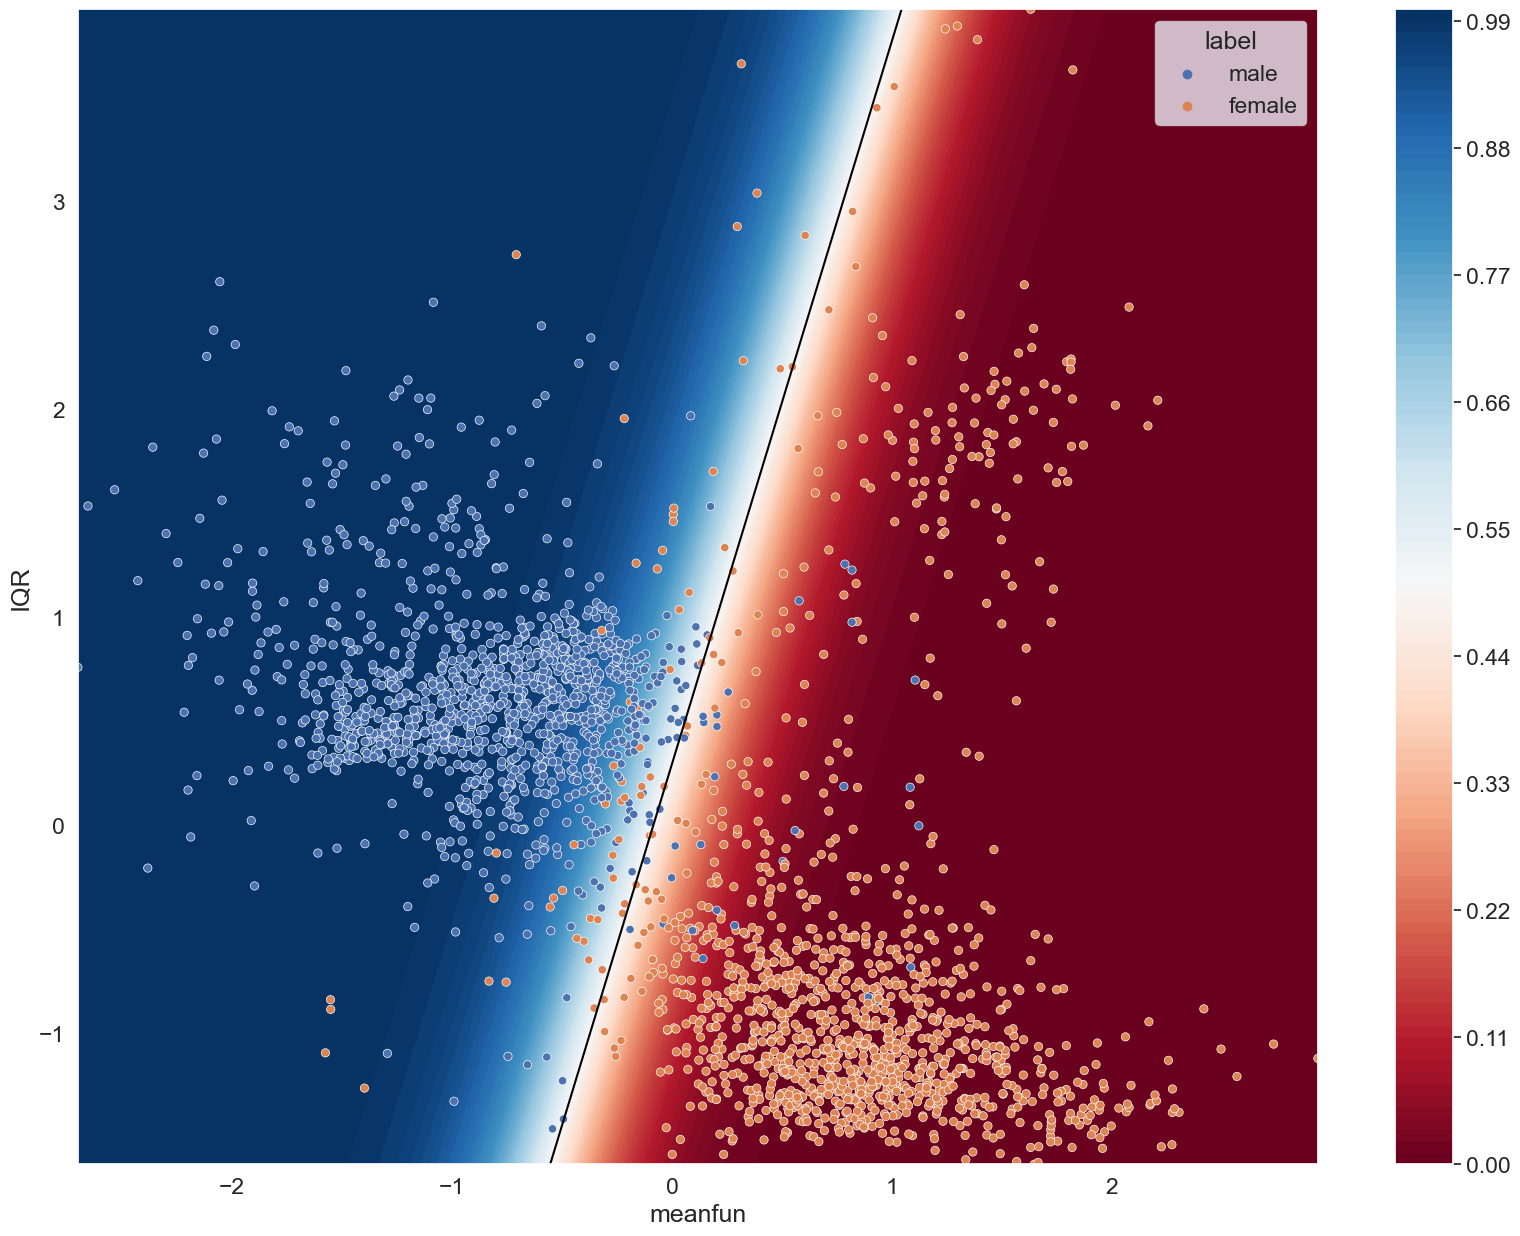

In [44]:
plt.figure(figsize=(20, 15))
x_plot = np.linspace(X_train_important["meanfun"].min(), X_train_important["meanfun"].max(), 100)
y_plot = np.linspace(X_train_important["IQR"].min(), X_train_important["IQR"].max(), 100)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
Z_plot = logreg.predict_proba(pd.DataFrame(np.array([X_plot.ravel(), Y_plot.ravel()]).T))[:, 1].reshape(X_plot.shape)
plt.contour(X_plot, Y_plot, Z_plot, levels=[0.5], colors="black")
plt.contourf(X_plot, Y_plot, Z_plot, levels=100, cmap="RdBu", vmin=0, vmax=1)
plt.colorbar()
sns.scatterplot(X_train_important, x="meanfun", y="IQR", hue=y_train["label"], sizes=(20, 200))

Then we try to use all the features.

In [45]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=87, max_iter=1000).fit(X_train, y_train.squeeze())
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
for i, beta in enumerate(logreg.coef_[0]):
    print("beta_{}: {:.2f}".format(i + 1, beta))

beta_0: -0.93
beta_1: -0.22
beta_2: -0.12
beta_3: -0.68
beta_4: 0.58
beta_5: 1.10
beta_6: 0.38
beta_7: 0.51
beta_8: -0.90
beta_9: 1.40
beta_10: -1.51
beta_11: 0.14
beta_12: -4.82
beta_13: 0.73
beta_14: 0.05
beta_15: -0.23
beta_16: -0.07
beta_17: 0.02
beta_18: -0.04
beta_19: -0.04


Training set accuracy: 0.97
Test set accuracy: 0.98
True Positive Rate: 0.97
True Negative Rate: 0.98
False Positive Rate: 0.02
False Negative Rate: 0.03


<Axes: >

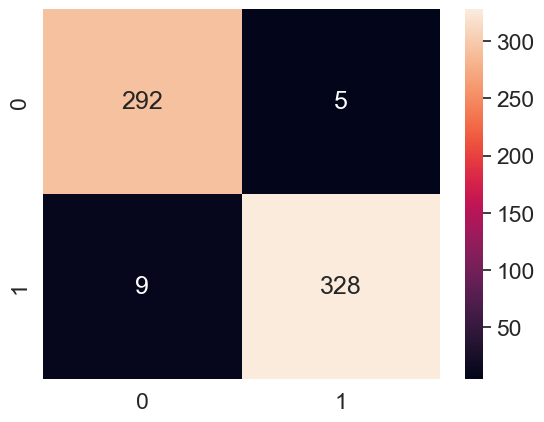

In [46]:
logreg_3_train_accuracy = logreg.score(X_train, y_train)
logreg_3_test_accuracy = logreg.score(X_test, y_test)

print("Training set accuracy: {:.2f}".format(logreg.score(X_train, y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(logreg.score(X_test, y_test.squeeze())))

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test)).ravel()
TPR_logreg_3 = TP / (TP + FN)
TNR_logreg_3 = TN / (TN + FP)
FPR_logreg_3 = FP / (FP + TN)
FNR_logreg_3 = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_logreg_3))
print("True Negative Rate: {:.2f}".format(TNR_logreg_3))
print("False Positive Rate: {:.2f}".format(FPR_logreg_3))
print("False Negative Rate: {:.2f}".format(FNR_logreg_3))

sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test)), annot=True, fmt="d")

We try to summarize the performance of the logistic regression model.

In [47]:
results = pd.DataFrame(
    {
        "Model": ["Logistic Regression with 1 feature", "Logistic Regression with 2 features",
                  "Logistic Regression with all features"],
        "Training Accuracy": [logreg_1_train_accuracy, logreg_2_train_accuracy, logreg_3_train_accuracy],
        "Test Accuracy": [logreg_1_test_accuracy, logreg_2_test_accuracy, logreg_3_test_accuracy],
    }
)
results

Model  Training Accuracy  Test Accuracy
0     Logistic Regression with 1 feature           0.955012       0.951104
1    Logistic Regression with 2 features           0.963694       0.976341
2  Logistic Regression with all features           0.973954       0.977918

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=87).fit(X_train, y_train.squeeze())

In [49]:
rf.score(X_train, y_train)

1.0

In [50]:
rf.score(X_test, y_test)

0.9842271293375394

## Support Vector Machines

Support vector machines are a powerful and flexible class of supervised algorithms for both classification and regression. They are particularly well suited for classification of complex but small- or medium-sized datasets.

We try to use it in our dataset.

The main idea of SVM is to find a hyperplane that can separate the data. The hyperplane is the decision boundary that separates the data into different classes. The goal is to find the hyperplane that has the largest distance to the nearest data points of any class. This is called the maximum margin hyperplane.

### Use 2 Features

Firstly, for easier visualization, we try to use only 2 features, which is `meanfun` and `IQR`.

In [51]:
def draw_svm_plot(svm, X, y, title):
    plt.figure(figsize=(20, 20))
    x_plot = np.linspace(X["meanfun"].min(), X["meanfun"].max(), 100)
    y_plot = np.linspace(X["IQR"].min(), X["IQR"].max(), 100)
    X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
    xy = np.vstack([X_plot.ravel(), Y_plot.ravel()]).T
    Z = svm.decision_function(xy).reshape(X_plot.shape)
    plt.contour(X_plot, Y_plot, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"], linewidths=3)
    sns.scatterplot(data=X_train_important, x="meanfun", y="IQR", hue=y_train.squeeze())
    plt.xlabel("meanfun")
    plt.ylabel("IQR")
    plt.title(title)
    plt.show()

#### Linear Kernel

The linear kernel is the simplest kernel. The formula for the linear kernel is:
$$
K(x, x') = x^T x'
$$

Training set accuracy: 0.96
Test set accuracy: 0.97
True Positive Rate: 0.98
True Negative Rate: 0.97
False Positive Rate: 0.03
False Negative Rate: 0.02


<Axes: >

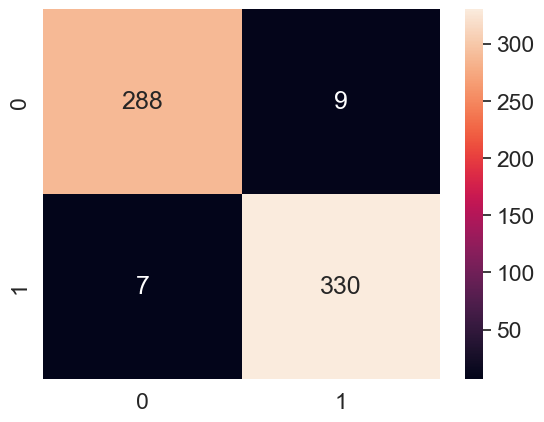

In [52]:
from sklearn.svm import SVC

svm = SVC(random_state=87, kernel="linear").fit(X_train_important, y_train.squeeze())

svm_2_linear_train_accuracy = svm.score(X_train_important, y_train)
svm_2_linear_test_accuracy = svm.score(X_test[["meanfun", "IQR"]], y_test)

print("Training set accuracy: {:.2f}".format(svm.score(X_train_important, y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(svm.score(X_test_important, y_test.squeeze())))

TN, FP, FN, TP = confusion_matrix(y_test, svm.predict(X_test_important)).ravel()
TPR_svm_2_linear = TP / (TP + FN)
TNR_svm_2_linear = TN / (TN + FP)
FPR_svm_2_linear = FP / (FP + TN)
FNR_svm_2_linear = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_svm_2_linear))
print("True Negative Rate: {:.2f}".format(TNR_svm_2_linear))
print("False Positive Rate: {:.2f}".format(FPR_svm_2_linear))
print("False Negative Rate: {:.2f}".format(FNR_svm_2_linear))

sns.heatmap(confusion_matrix(y_test, svm.predict(X_test_important)), annot=True, fmt="d")

C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


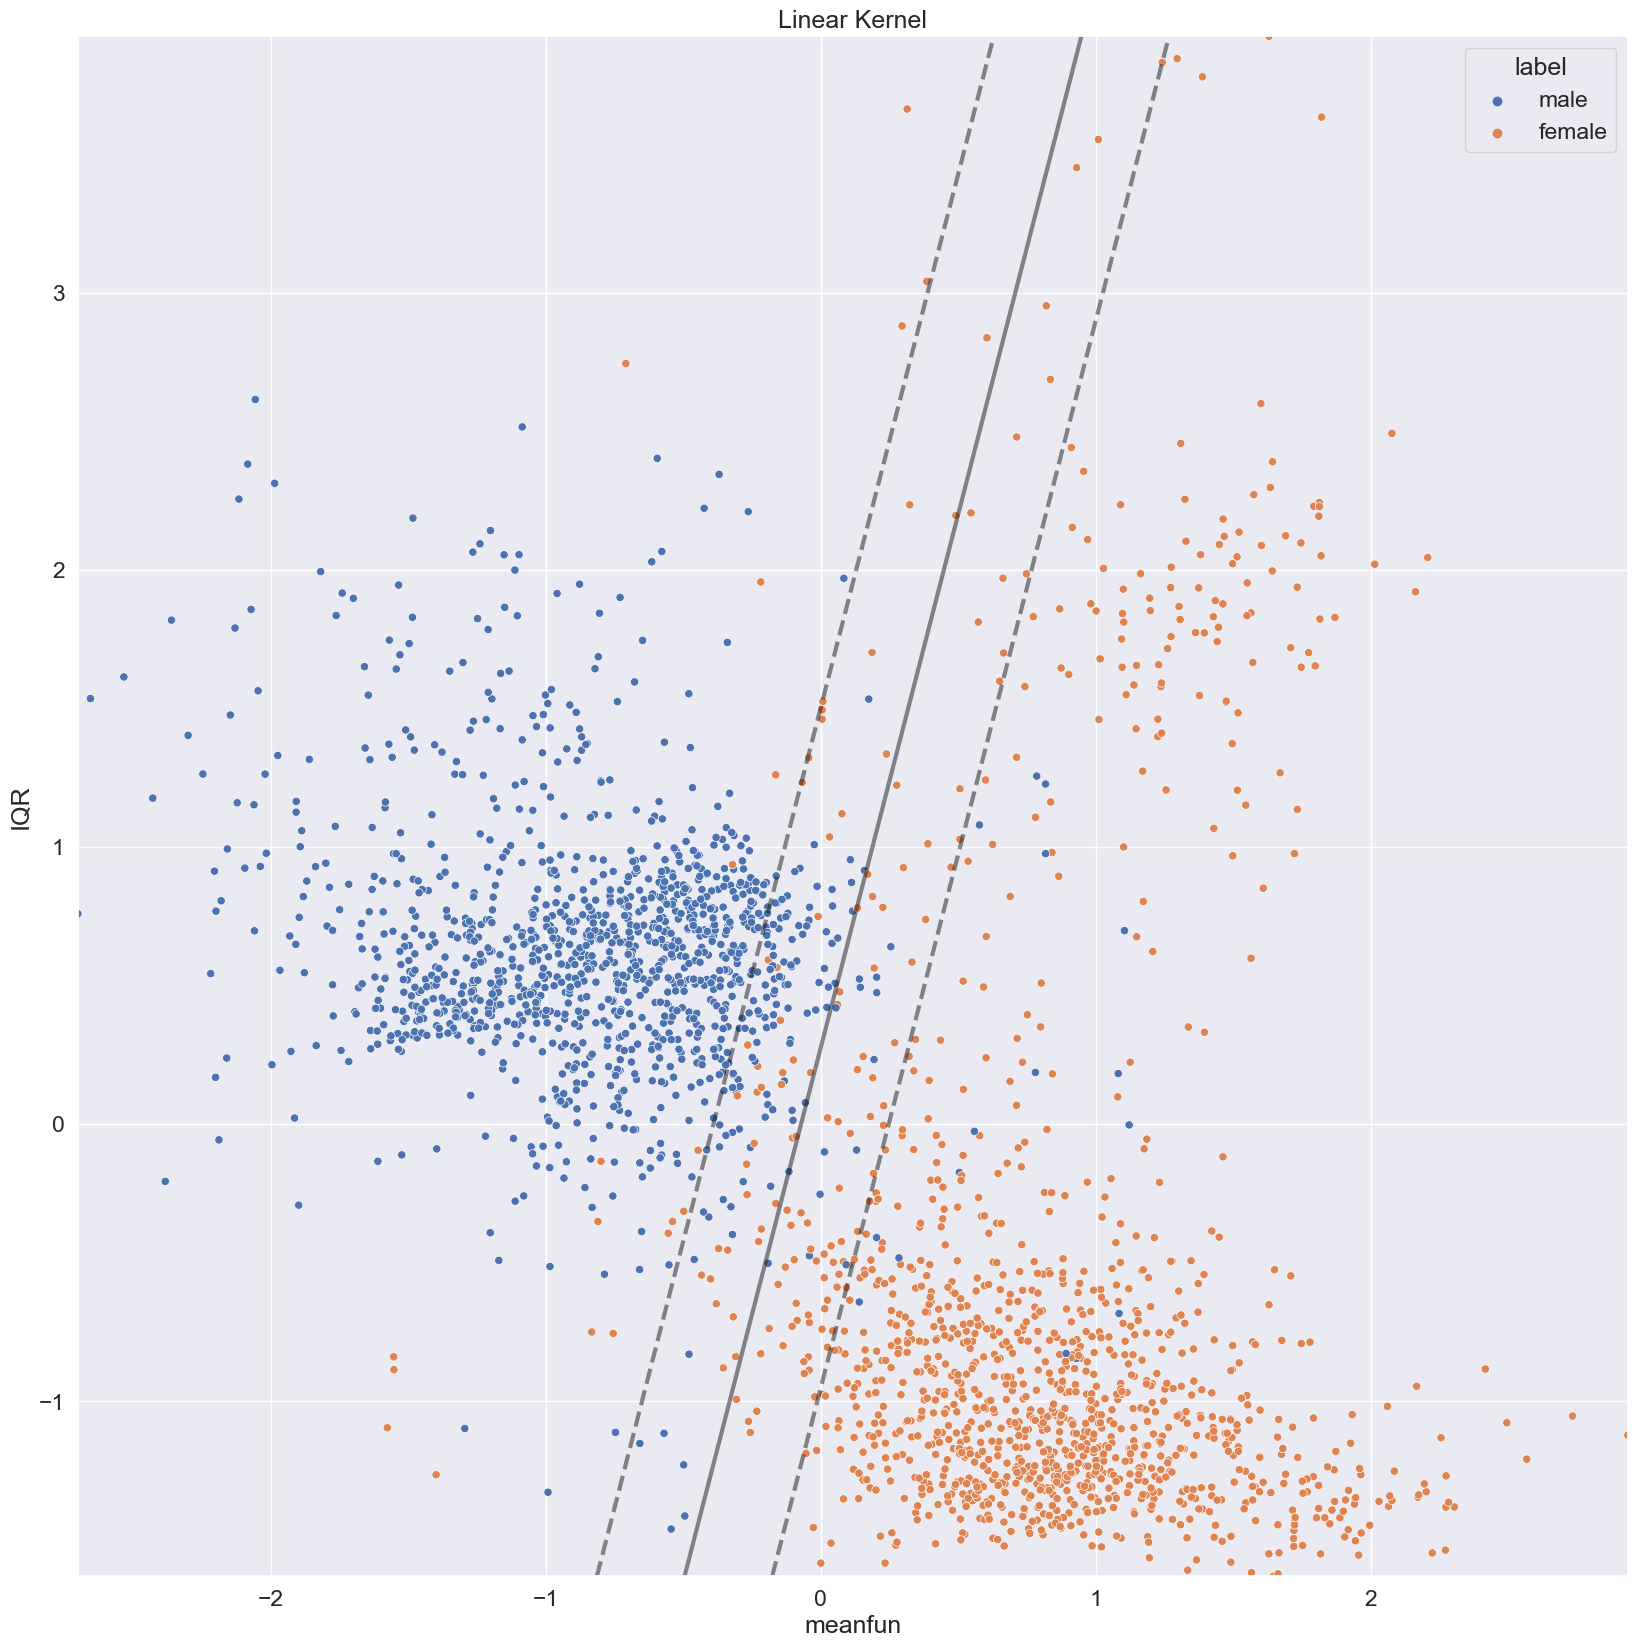

In [53]:
draw_svm_plot(svm, X_train_important, y_train, "Linear Kernel")

#### Polynomial Kernel

The polynomial kernel is a more complex kernel. The formula for the polynomial kernel is:
$$
K(x, x') = (x^T x' + 1)^d
$$

Let's try to use the polynomial kernel with degree 3.

Training set accuracy: 0.94
Test set accuracy: 0.96
True Positive Rate: 0.99
True Negative Rate: 0.93
False Positive Rate: 0.07
False Negative Rate: 0.01


<Axes: >

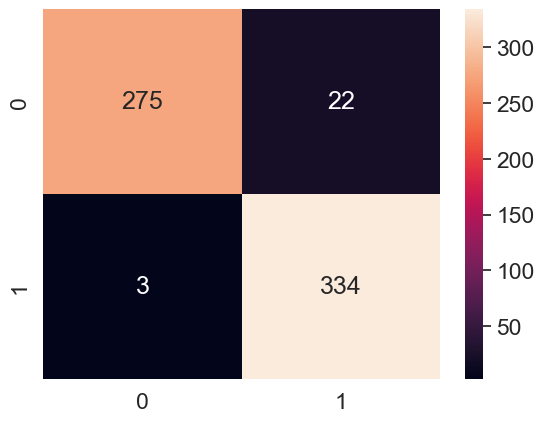

In [54]:
svm = SVC(random_state=87, kernel="poly", degree=3).fit(X_train_important, y_train.squeeze())

svm_2_poly_train_accuracy = svm.score(X_train_important, y_train)
svm_2_poly_test_accuracy = svm.score(X_test[["meanfun", "IQR"]], y_test)

print("Training set accuracy: {:.2f}".format(svm.score(X_train_important, y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(svm.score(X_test_important, y_test.squeeze())))

TN, FP, FN, TP = confusion_matrix(y_test, svm.predict(X_test_important)).ravel()
TPR_svm_2_poly = TP / (TP + FN)
TNR_svm_2_poly = TN / (TN + FP)
FPR_svm_2_poly = FP / (FP + TN)
FNR_svm_2_poly = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_svm_2_poly))
print("True Negative Rate: {:.2f}".format(TNR_svm_2_poly))
print("False Positive Rate: {:.2f}".format(FPR_svm_2_poly))
print("False Negative Rate: {:.2f}".format(FNR_svm_2_poly))

sns.heatmap(confusion_matrix(y_test, svm.predict(X_test_important)), annot=True, fmt="d")

C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


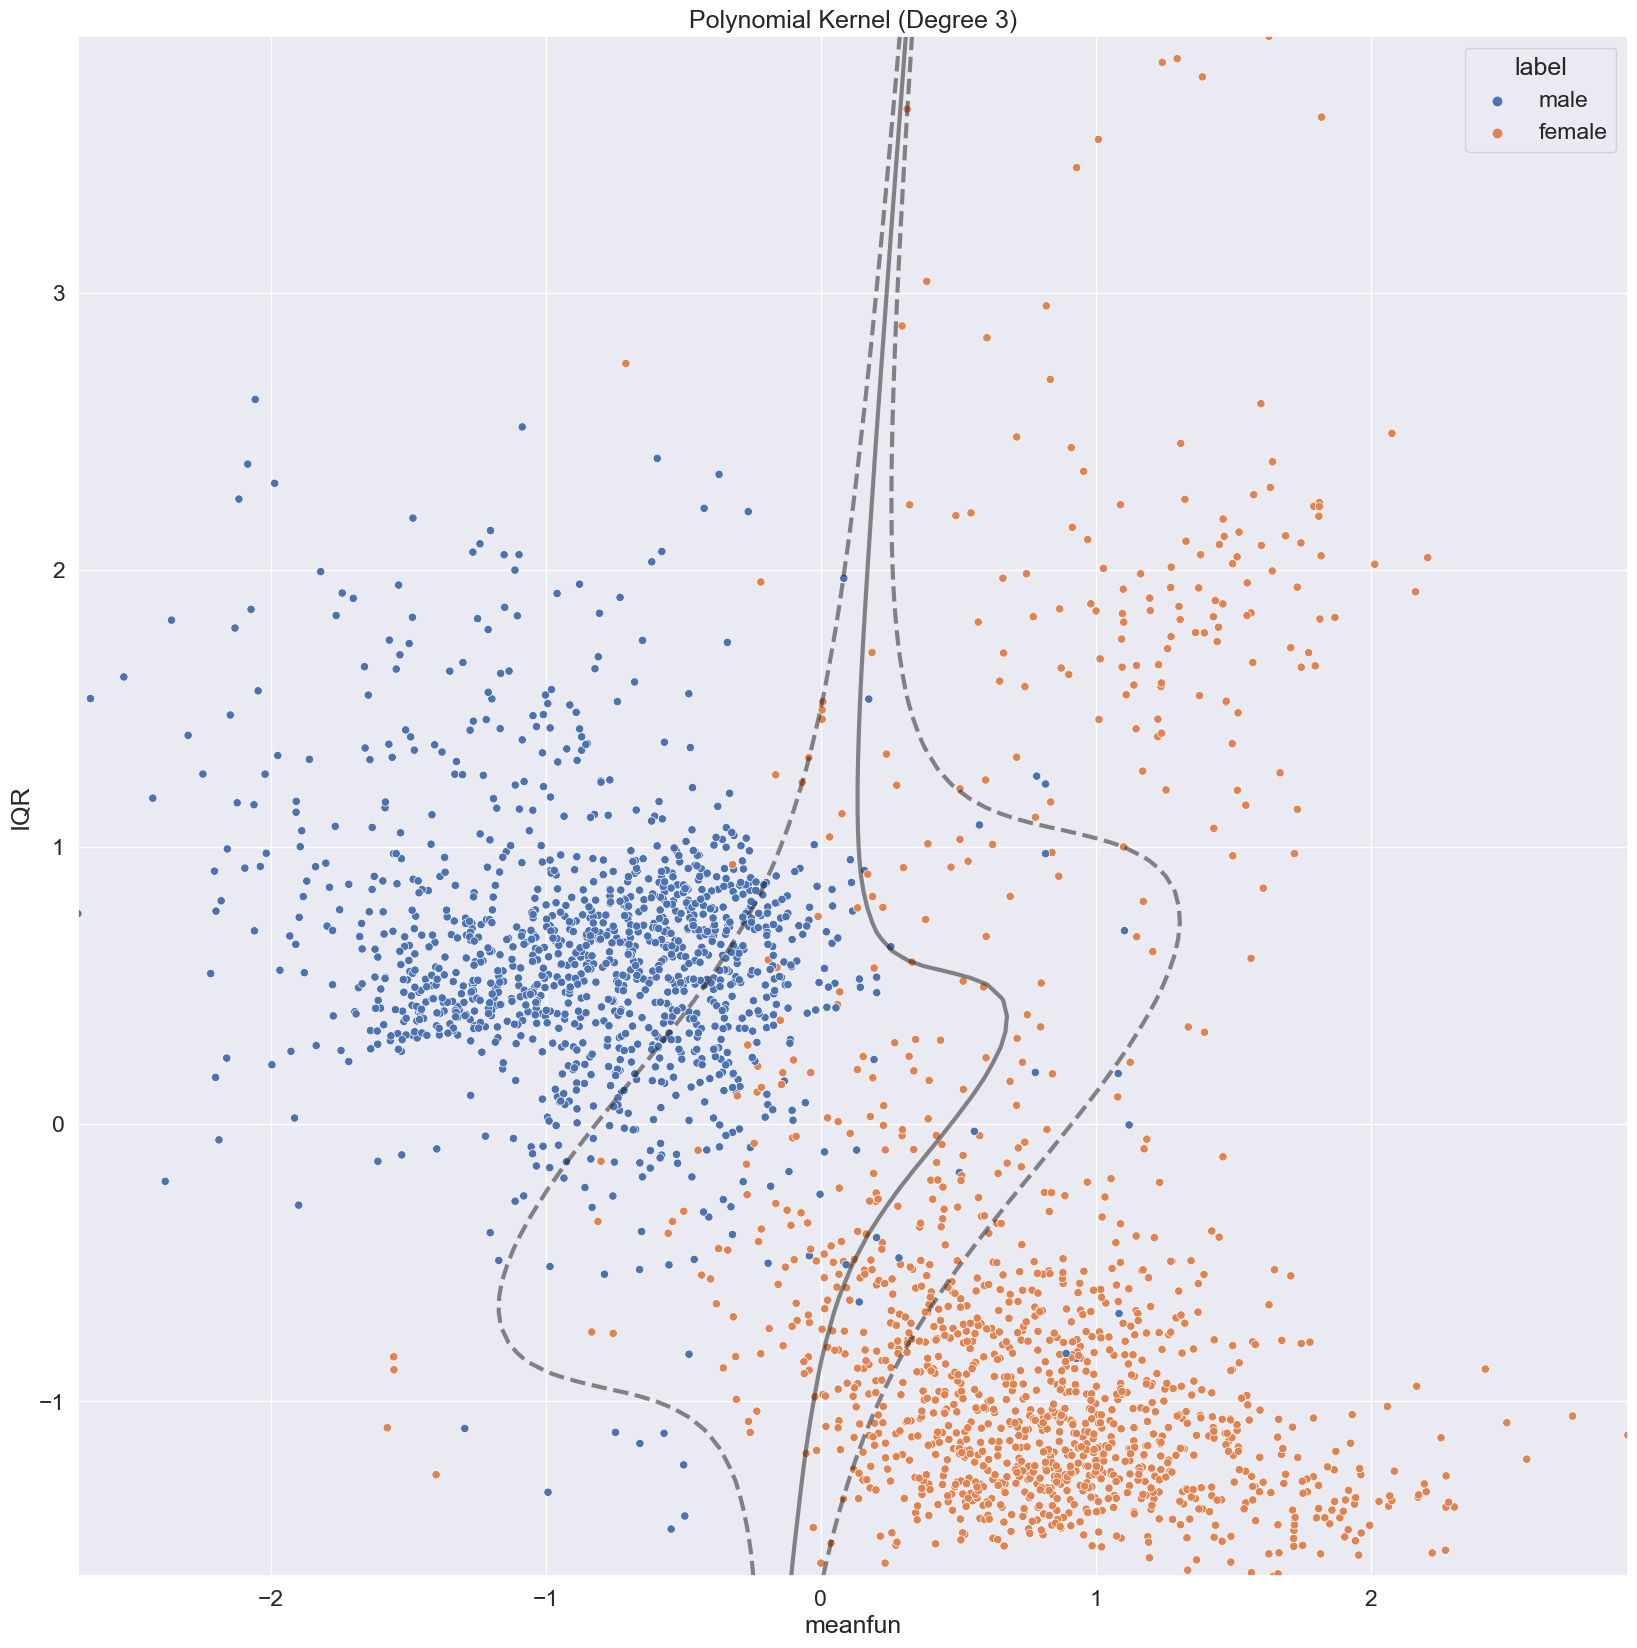

In [56]:
draw_svm_plot(svm, X_train_important, y_train, "Polynomial Kernel (Degree 3)")

#### Gaussian Kernel

The Gaussian kernel is a more complex kernel. The formula for the Gaussian kernel is:
$$
K(x, x') = \exp(-\gamma ||x - x'||^2)
$$

Training set accuracy: 0.97
Test set accuracy: 0.98
True Positive Rate: 0.98
True Negative Rate: 0.98
False Positive Rate: 0.02
False Negative Rate: 0.02


<Axes: >

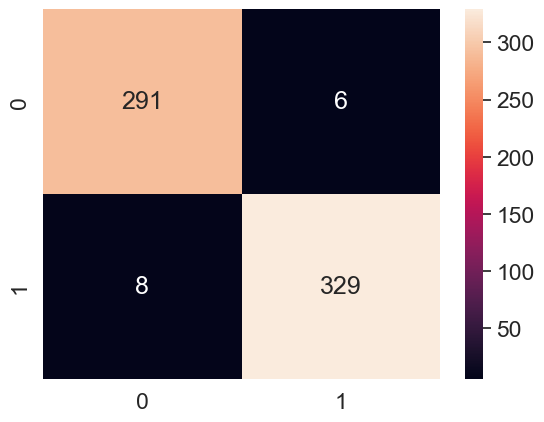

In [57]:
svm = SVC(random_state=87, kernel="rbf", gamma=0.1).fit(X_train_important, y_train.squeeze())

svm_2_gaussian_train_accuracy = svm.score(X_train_important, y_train)
svm_2_gaussian_test_accuracy = svm.score(X_test[["meanfun", "IQR"]], y_test)

print("Training set accuracy: {:.2f}".format(svm.score(X_train_important, y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(svm.score(X_test_important, y_test.squeeze())))

TN, FP, FN, TP = confusion_matrix(y_test, svm.predict(X_test_important)).ravel()
TPR_svm_2_gaussian = TP / (TP + FN)
TNR_svm_2_gaussian = TN / (TN + FP)
FPR_svm_2_gaussian = FP / (FP + TN)
FNR_svm_2_gaussian = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_svm_2_gaussian))
print("True Negative Rate: {:.2f}".format(TNR_svm_2_gaussian))
print("False Positive Rate: {:.2f}".format(FPR_svm_2_gaussian))
print("False Negative Rate: {:.2f}".format(FNR_svm_2_gaussian))

sns.heatmap(confusion_matrix(y_test, svm.predict(X_test_important)), annot=True, fmt="d")

C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


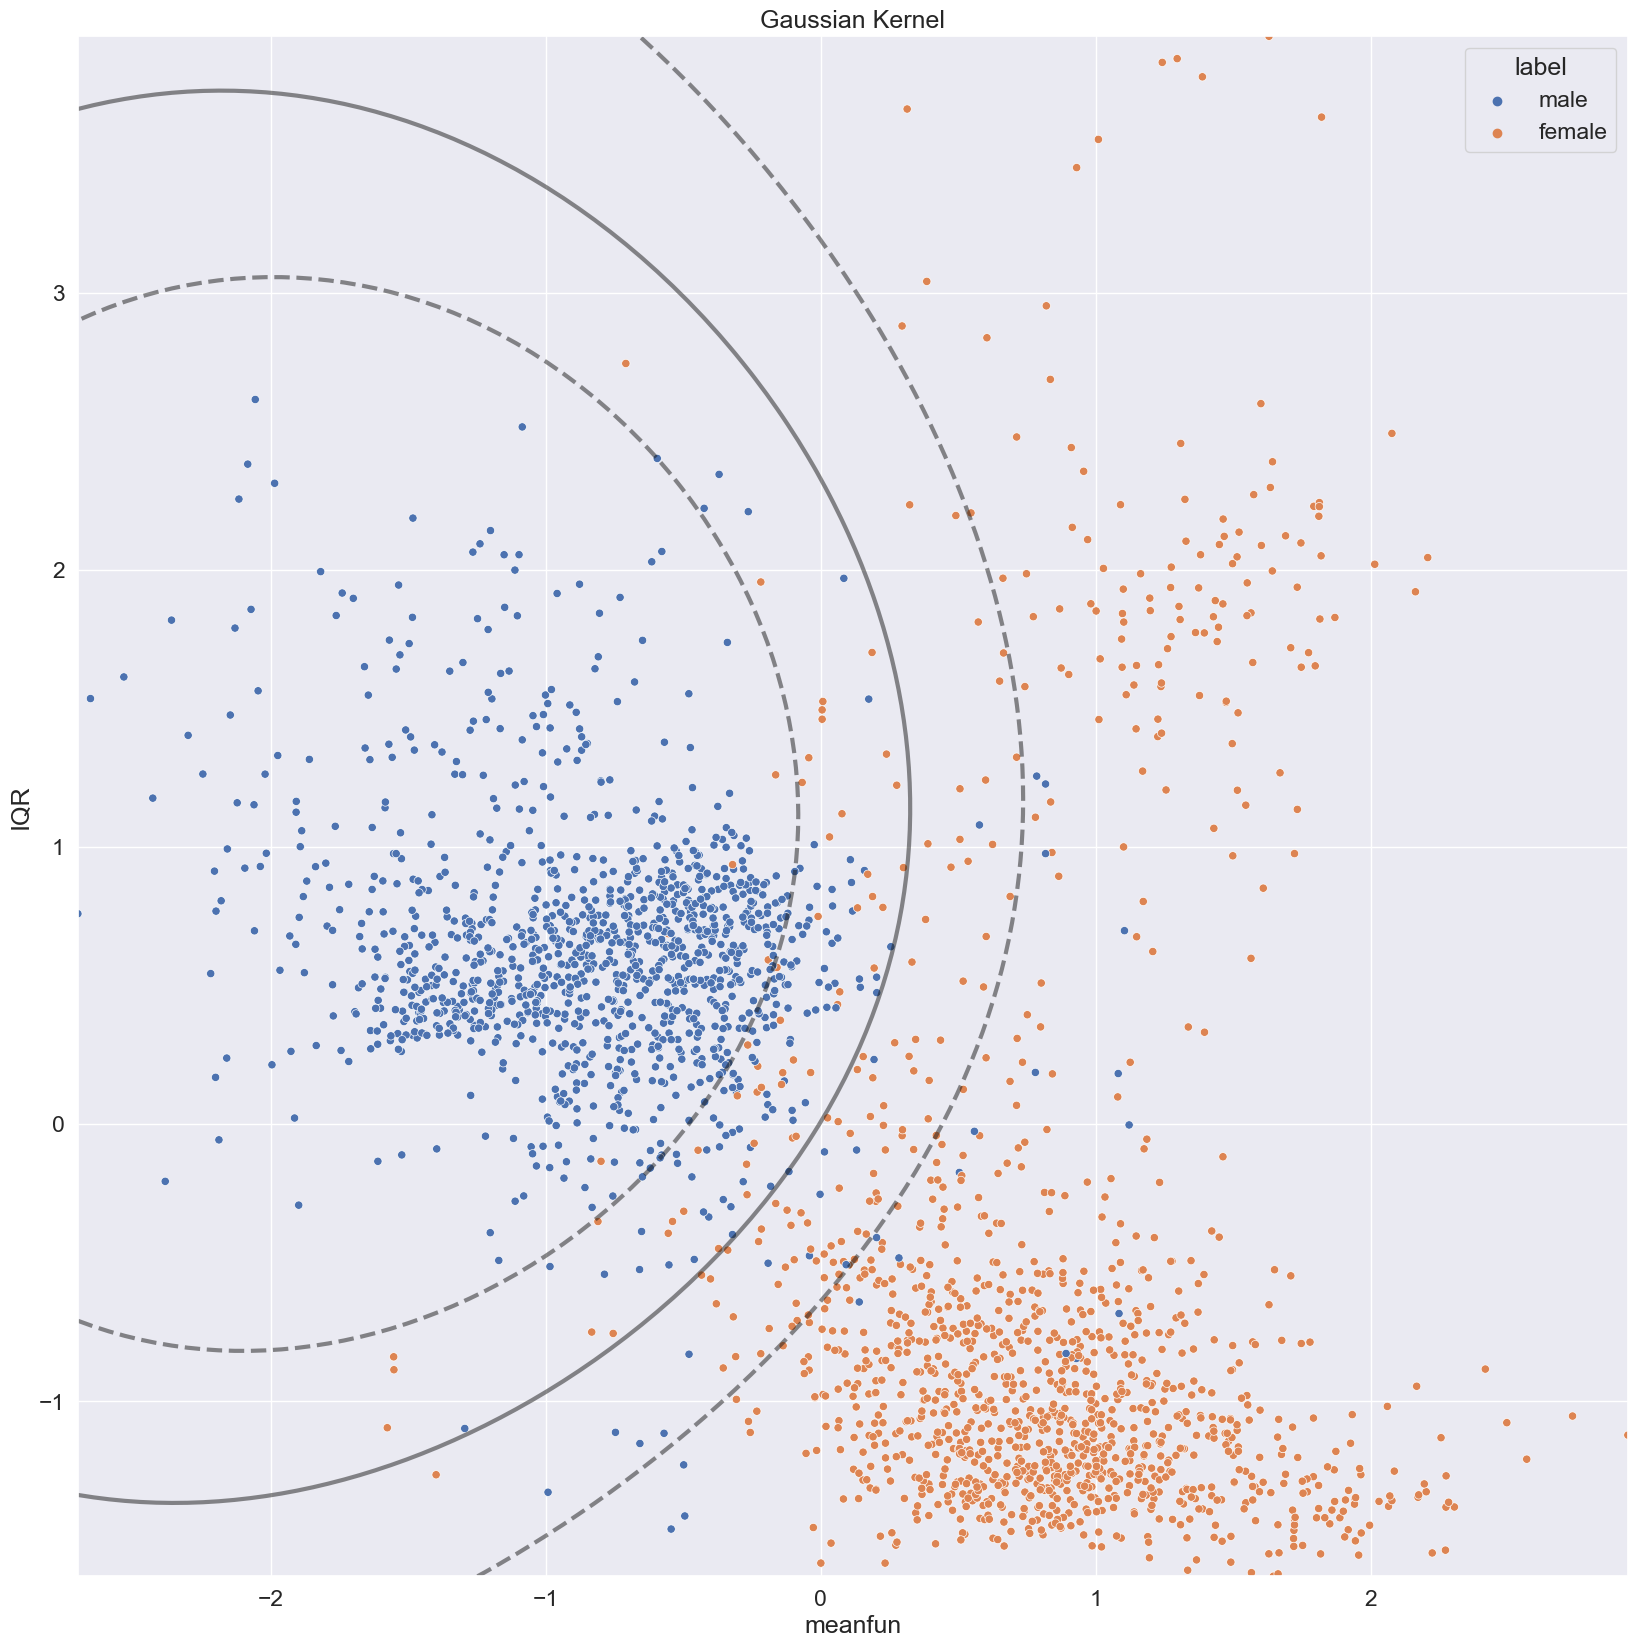

In [59]:
draw_svm_plot(svm, X_train_important, y_train, "Gaussian Kernel")

#### Sigmoid Kernel

The sigmoid kernel is a more complex kernel. The formula for the sigmoid kernel is:
$$
K(x, x') = \tanh(\gamma x^T x' + r)
$$

Training set accuracy: 0.94
Test set accuracy: 0.94
True Positive Rate: 0.94
True Negative Rate: 0.95
False Positive Rate: 0.05
False Negative Rate: 0.06


<Axes: >

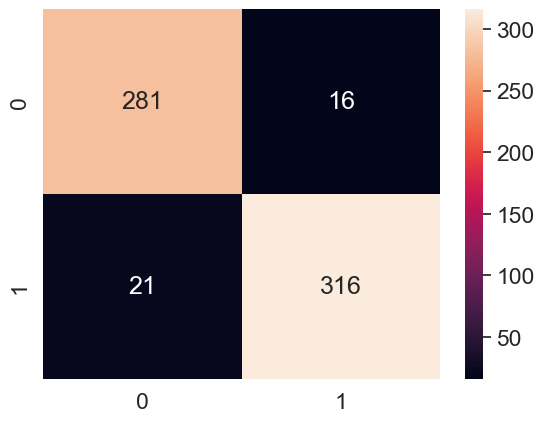

In [60]:
svm = SVC(random_state=87, kernel="sigmoid", gamma=0.1, coef0=0.1).fit(X_train_important, y_train.squeeze())

svm_2_sigmoid_train_accuracy = svm.score(X_train_important, y_train)
svm_2_sigmoid_test_accuracy = svm.score(X_test[["meanfun", "IQR"]], y_test)

print("Training set accuracy: {:.2f}".format(svm.score(X_train_important, y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(svm.score(X_test_important, y_test.squeeze())))

TN, FP, FN, TP = confusion_matrix(y_test, svm.predict(X_test_important)).ravel()
TPR_svm_2_sigmoid = TP / (TP + FN)
TNR_svm_2_sigmoid = TN / (TN + FP)
FPR_svm_2_sigmoid = FP / (FP + TN)
FNR_svm_2_sigmoid = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_svm_2_sigmoid))
print("True Negative Rate: {:.2f}".format(TNR_svm_2_sigmoid))
print("False Positive Rate: {:.2f}".format(FPR_svm_2_sigmoid))
print("False Negative Rate: {:.2f}".format(FNR_svm_2_sigmoid))

sns.heatmap(confusion_matrix(y_test, svm.predict(X_test_important)), annot=True, fmt="d")

C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


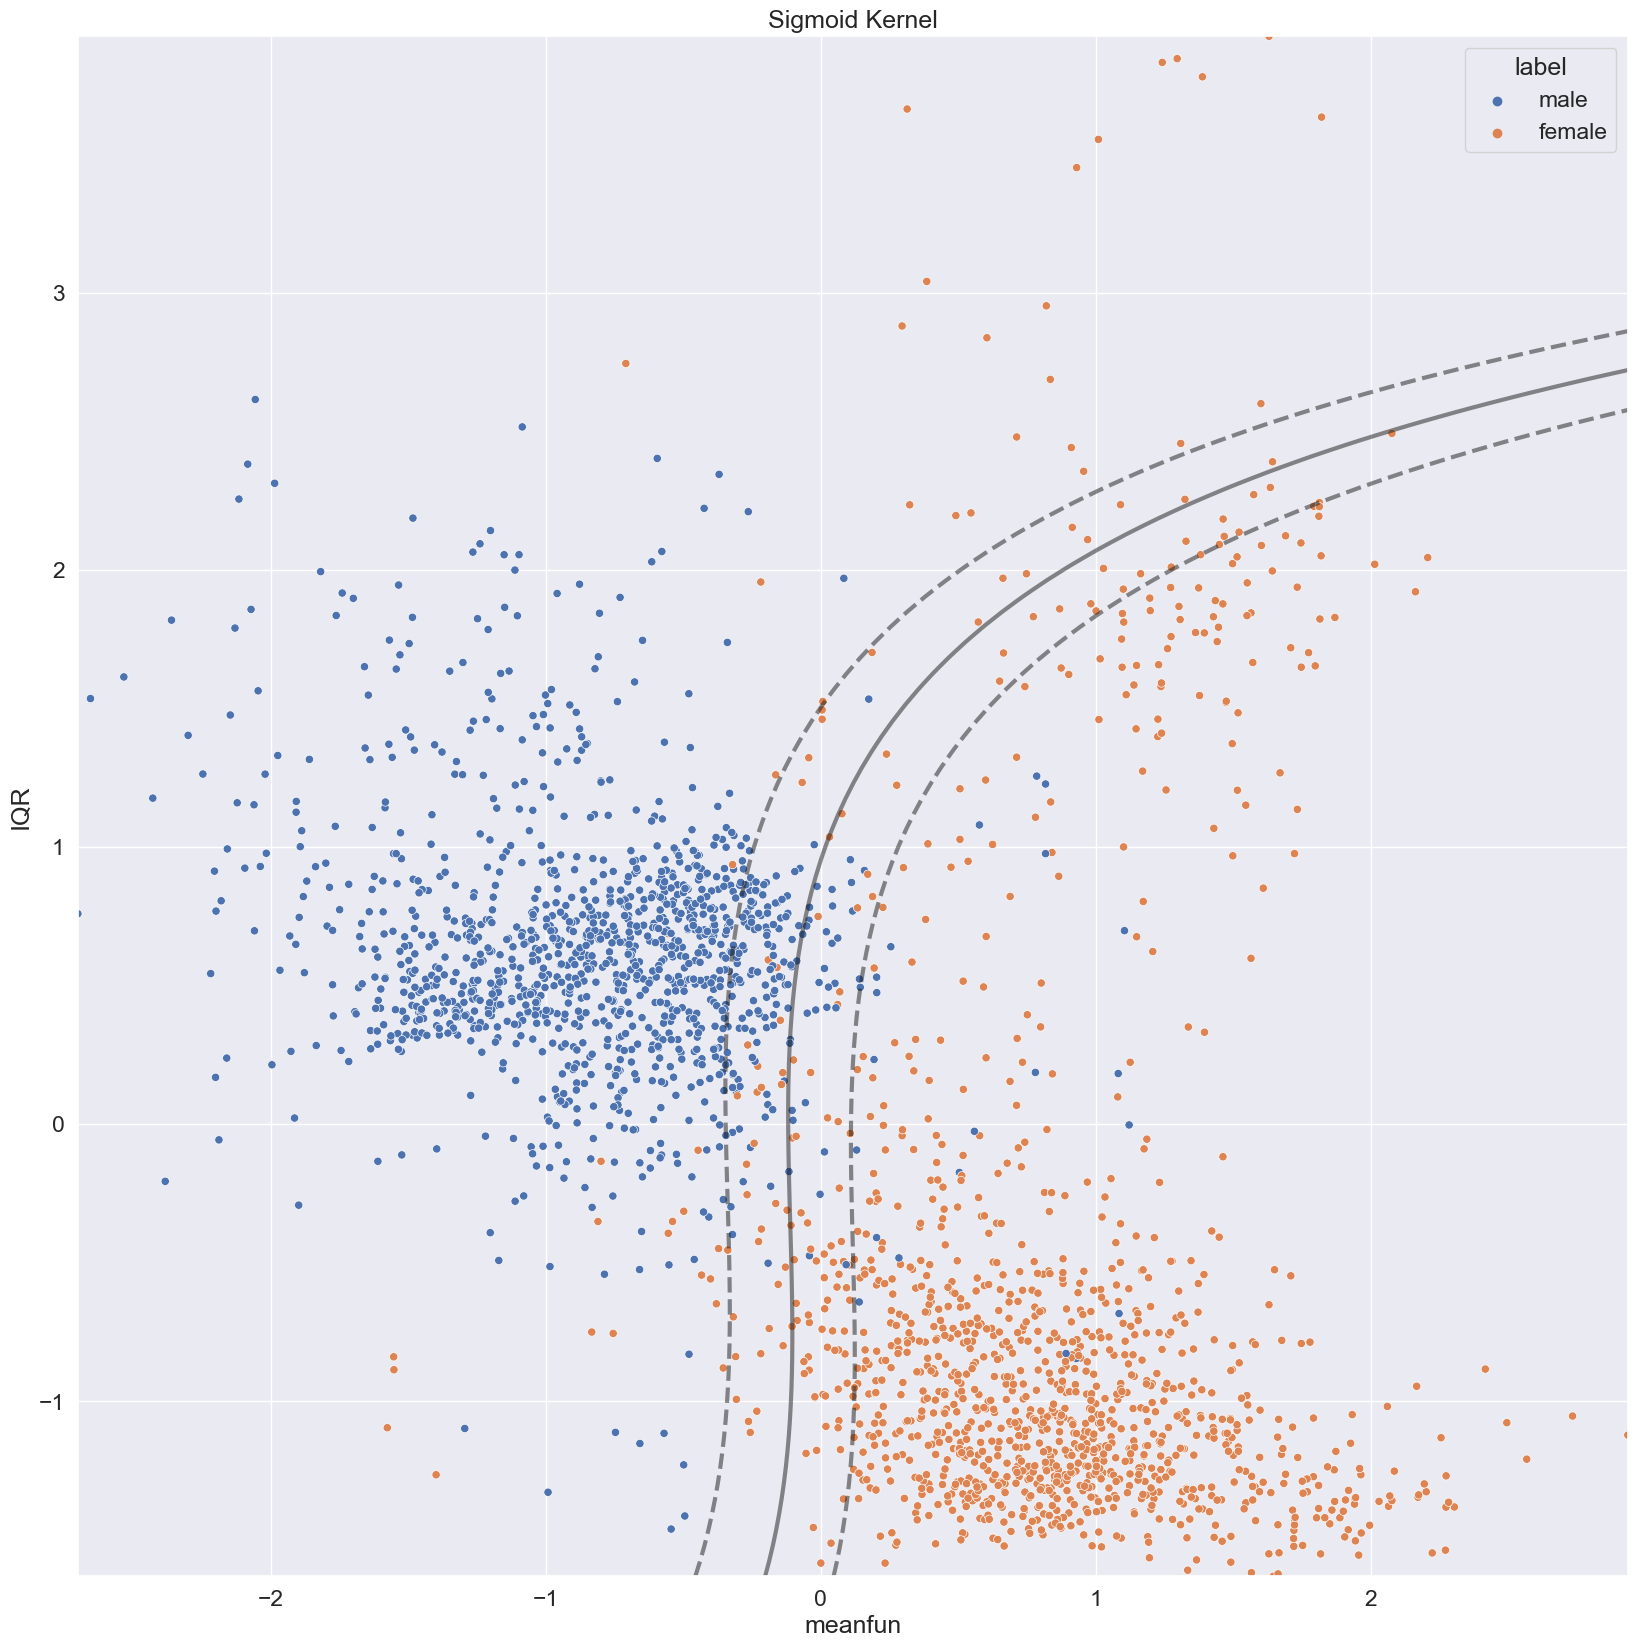

In [62]:
draw_svm_plot(svm, X_train_important, y_train, "Sigmoid Kernel")

Here are the comparison of the results of the different kernels:

In [63]:
results = pd.DataFrame(
    {
        "Kernel": ["Linear", "Polynomial", "Gaussian", "Sigmoid"],
        "Training Accuracy": [
            svm_2_linear_train_accuracy,
            svm_2_poly_train_accuracy,
            svm_2_gaussian_train_accuracy,
            svm_2_sigmoid_train_accuracy,
        ],
        "Test Accuracy": [
            svm_2_linear_test_accuracy,
            svm_2_poly_test_accuracy,
            svm_2_gaussian_test_accuracy,
            svm_2_sigmoid_test_accuracy,
        ],
        "True Positive Rate": [
            TPR_svm_2_linear,
            TPR_svm_2_poly,
            TPR_svm_2_gaussian,
            TPR_svm_2_sigmoid,
        ],
        "True Negative Rate": [
            TNR_svm_2_linear,
            TNR_svm_2_poly,
            TNR_svm_2_gaussian,
            TNR_svm_2_sigmoid,
        ],
        "False Positive Rate": [
            FPR_svm_2_linear,
            FPR_svm_2_poly,
            FPR_svm_2_gaussian,
            FPR_svm_2_sigmoid,
        ],
        "False Negative Rate": [
            FNR_svm_2_linear,
            FNR_svm_2_poly,
            FNR_svm_2_gaussian,
            FNR_svm_2_sigmoid,
        ],
    }
)
results

Kernel  Training Accuracy  Test Accuracy  True Positive Rate  \
0      Linear           0.964088       0.974763            0.979228   
1  Polynomial           0.941200       0.960568            0.991098   
2    Gaussian           0.966456       0.977918            0.976261   
3     Sigmoid           0.943962       0.941640            0.937685   

   True Negative Rate  False Positive Rate  False Negative Rate  
0            0.969697             0.030303             0.020772  
1            0.925926             0.074074             0.008902  
2            0.979798             0.020202             0.023739  
3            0.946128             0.053872             0.062315

C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


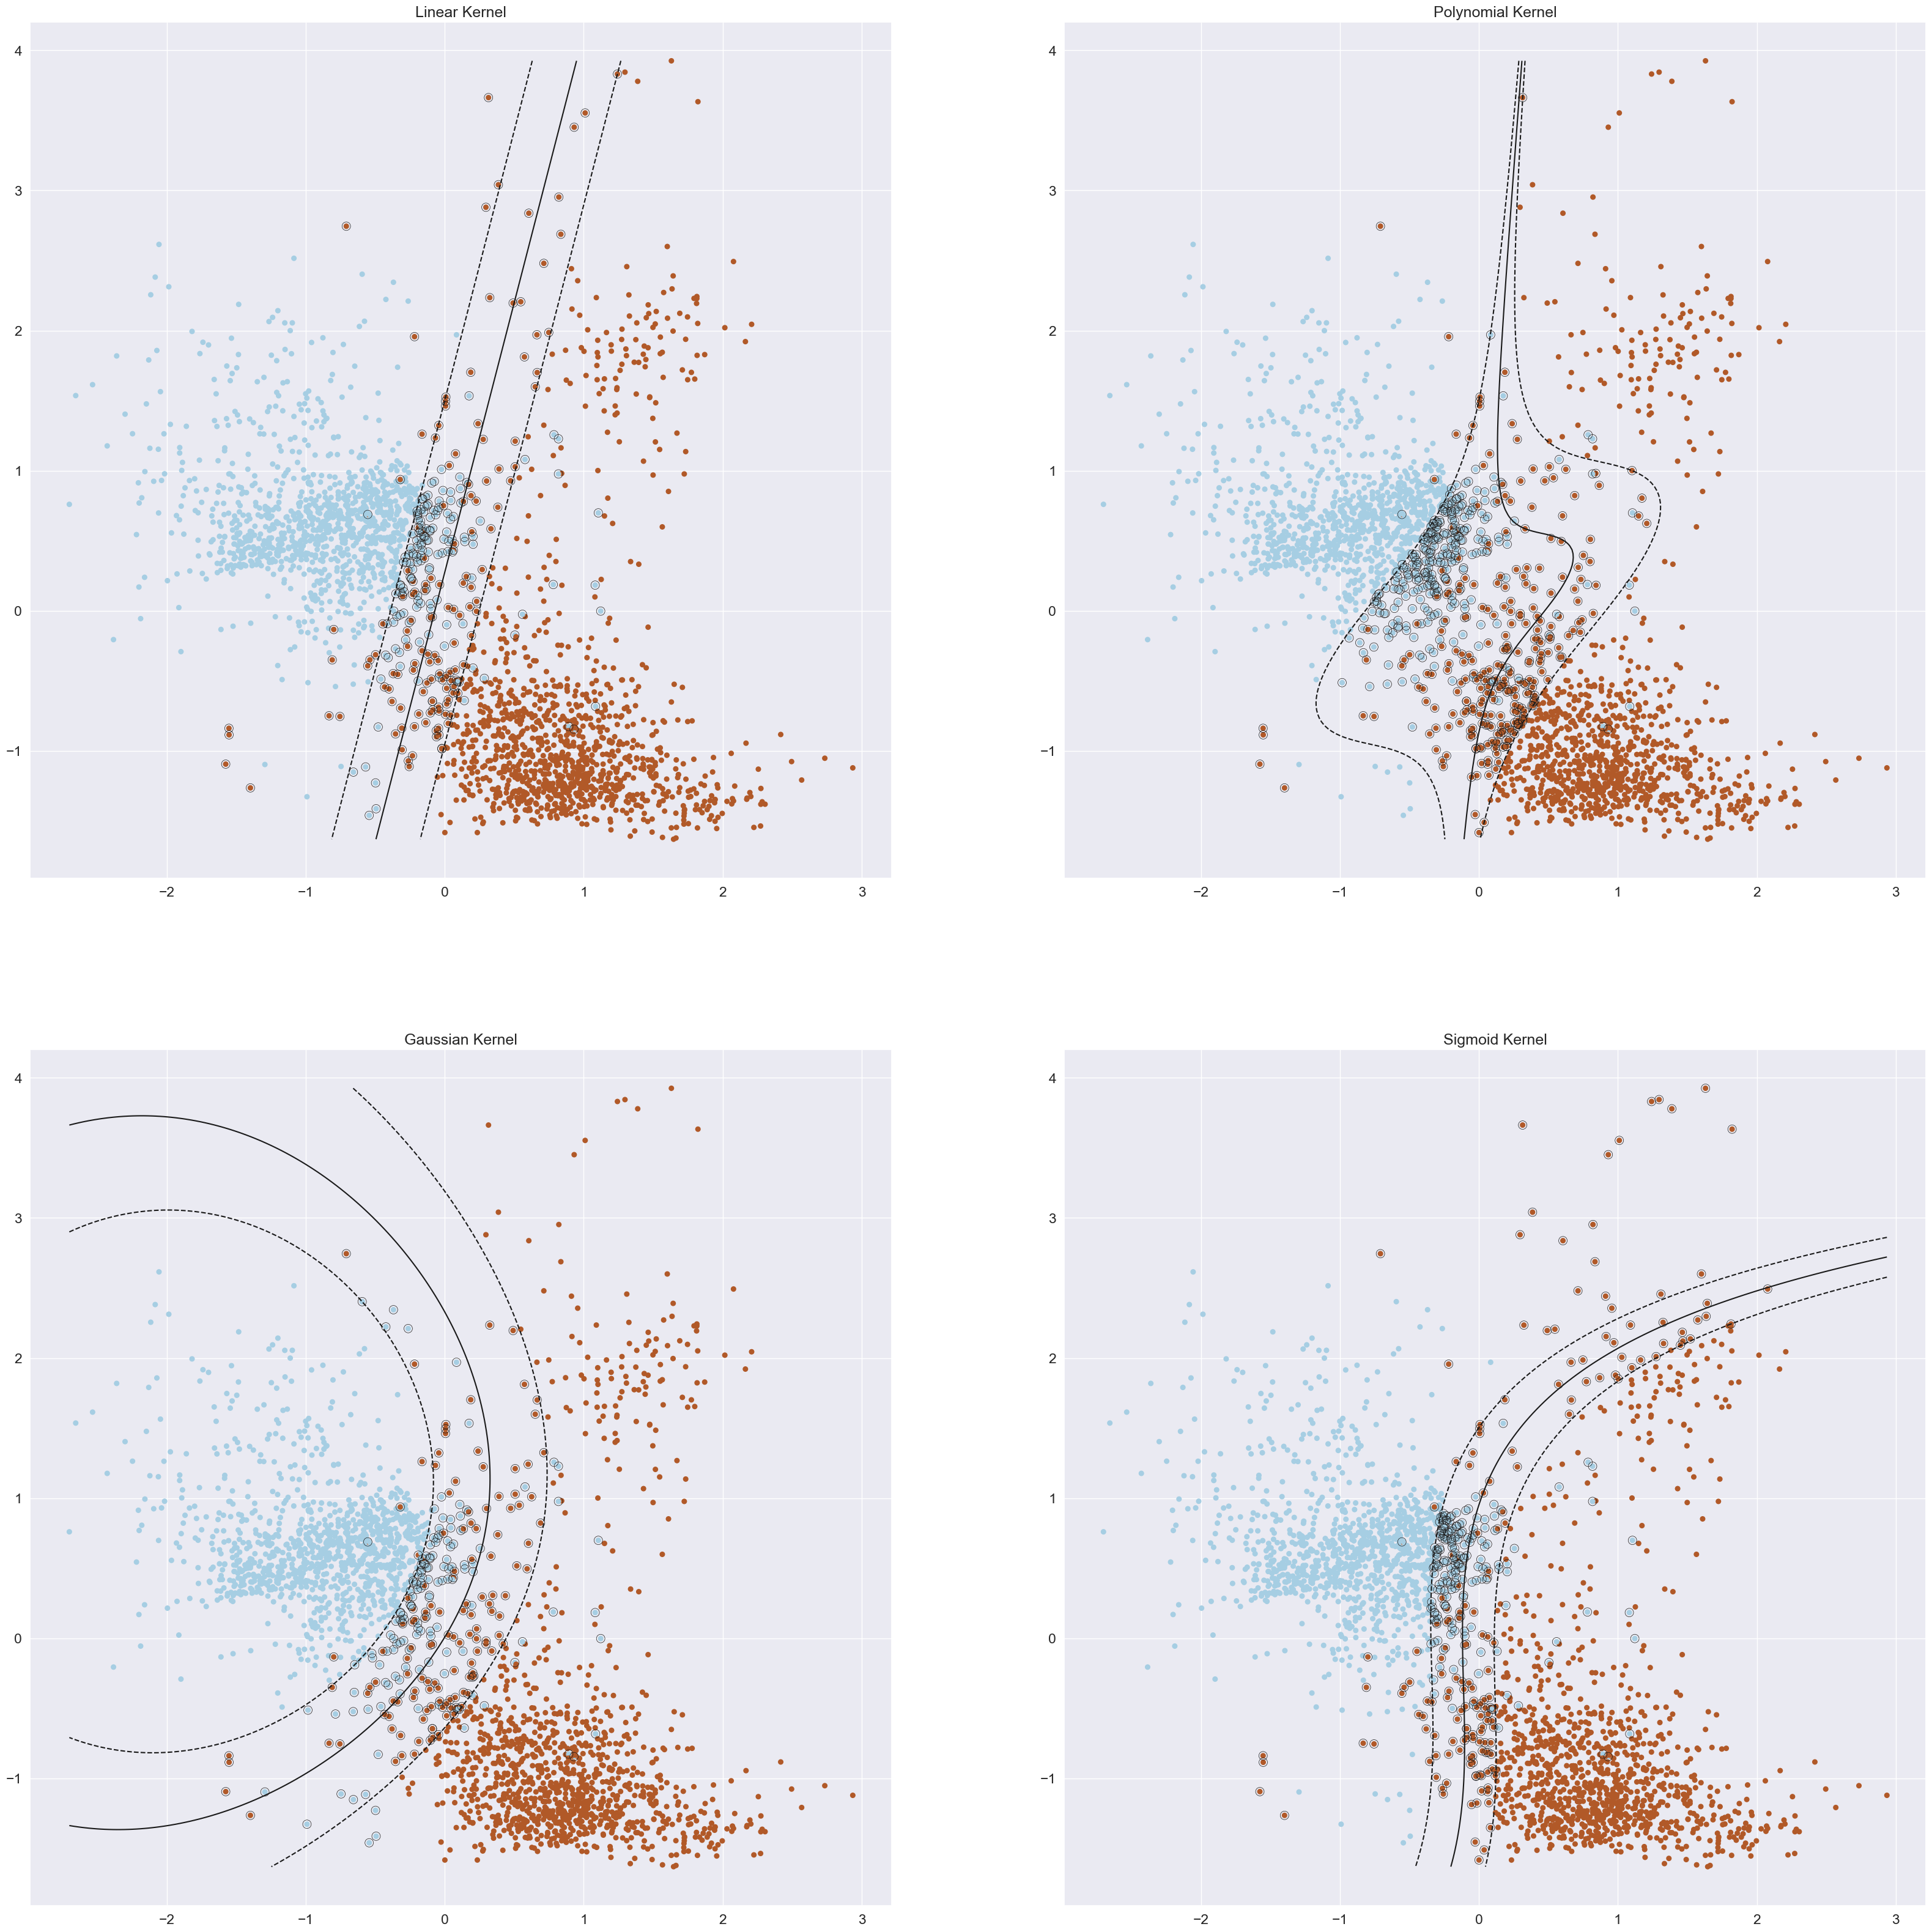

In [75]:
def draw_svm_plot_subplot(svm, X, y, title, axes):
    X = np.array(X)
    y = np.array(y == "female")

    axes.set_title(title)
    axes.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    axes.axis("tight")

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

    axes.contour(XX, YY, Z, colors=["k", "k", "k"], linestyles=["--", "-", "--"], levels=[-1, 0, 1])
    axes.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=0.5, facecolors="none", edgecolors="k")

figure, axes = plt.subplots(2, 2, figsize=(40, 40))
draw_svm_plot_subplot(SVC(random_state=87, kernel="linear").fit(X_train_important, y_train.squeeze()), X_train_important, y_train, "Linear Kernel", axes[0, 0])
draw_svm_plot_subplot(SVC(random_state=87, kernel="poly", degree=3).fit(X_train_important, y_train.squeeze()), X_train_important, y_train, "Polynomial Kernel", axes[0, 1])
draw_svm_plot_subplot(SVC(random_state=87, kernel="rbf", gamma=0.1).fit(X_train_important, y_train.squeeze()), X_train_important, y_train, "Gaussian Kernel", axes[1, 0])
draw_svm_plot_subplot(SVC(random_state=87, kernel="sigmoid", gamma=0.1, coef0=0.1).fit(X_train_important, y_train.squeeze()), X_train_important, y_train, "Sigmoid Kernel", axes[1, 1])

### SVM with All Features

Now we will use all features to train the SVM model.

In [76]:
def train_with_all_features(kernel):
    svm = SVC(random_state=87, kernel=kernel).fit(X_train, y_train.squeeze())

    train_accuracy = svm.score(X_train, y_train)
    test_accuracy = svm.score(X_test, y_test)

    print("Training set accuracy: {:.2f}".format(train_accuracy))
    print("Test set accuracy: {:.2f}".format(test_accuracy))
    sns.heatmap(confusion_matrix(y_test, svm.predict(X_test)), annot=True, fmt="d")

    TN, FP, FN, TP = confusion_matrix(y_test, svm.predict(X_test)).ravel()
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)

    return train_accuracy, test_accuracy, TPR, TNR, FPR, FNR

#### Linear Kernel

Training set accuracy: 0.98
Test set accuracy: 0.98


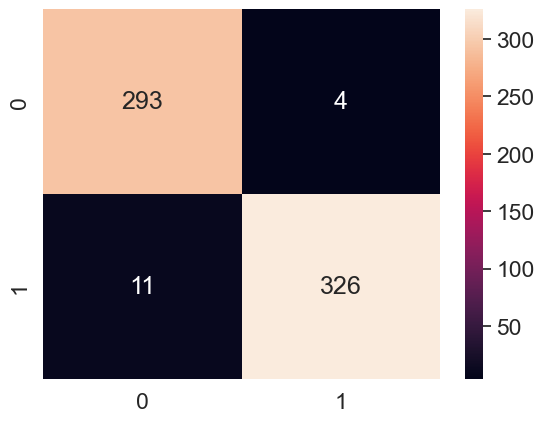

In [77]:
train_accuracy_svm_all_linear, test_accuracy_svm_all_linear, TPR_svm_all_linear, TNR_svm_all_linear, FPR_svm_all_linear, FNR_svm_all_linear = train_with_all_features("linear")

#### Polynomial Kernel

Training set accuracy: 0.98
Test set accuracy: 0.98


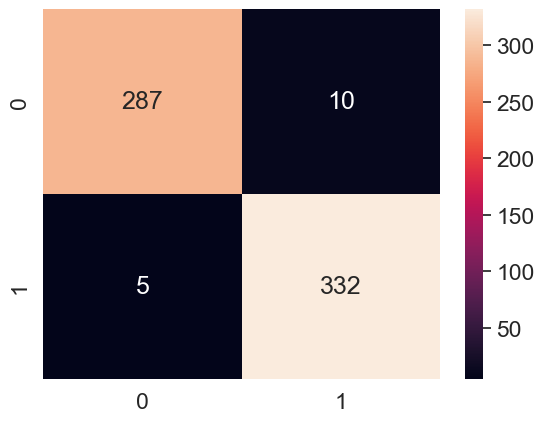

In [78]:
train_accuracy_svm_all_poly, test_accuracy_svm_all_poly, TPR_svm_all_poly, TNR_svm_all_poly, FPR_svm_all_poly, FNR_svm_all_poly = train_with_all_features("poly")

#### Gaussian Kernel

Training set accuracy: 0.99
Test set accuracy: 0.98


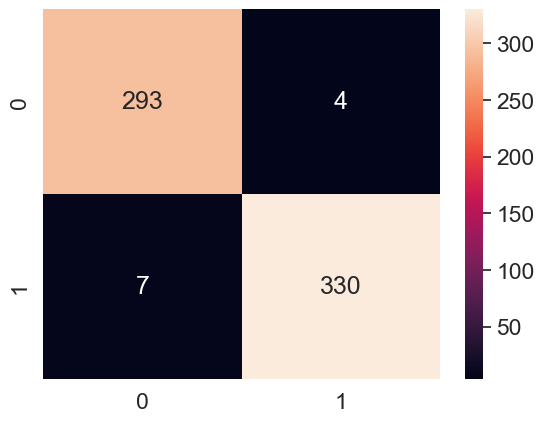

In [79]:
train_accuracy_svm_all_gaussian, test_accuracy_svm_all_gaussian, TPR_svm_all_gaussian, TNR_svm_all_gaussian, FPR_svm_all_gaussian, FNR_svm_all_gaussian = train_with_all_features("rbf")

#### Sigmoid Kernel

Training set accuracy: 0.80
Test set accuracy: 0.82


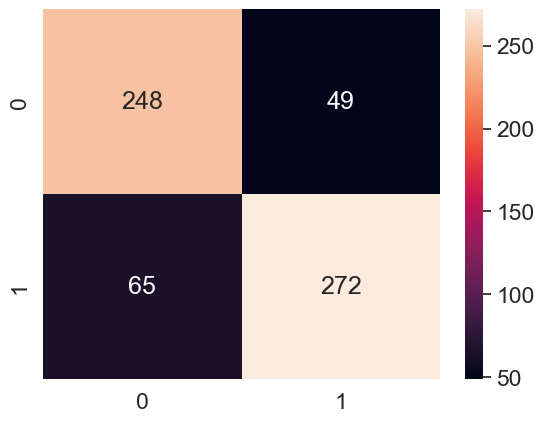

In [80]:
train_accuracy_svm_all_sigmoid, test_accuracy_svm_all_sigmoid, TPR_svm_all_sigmoid, TNR_svm_all_sigmoid, FPR_svm_all_sigmoid, FNR_svm_all_sigmoid = train_with_all_features("sigmoid")

#### Comparison

Here are the comparison of the results of the different kernels:

In [81]:
results = pd.DataFrame(
    {
        "Kernel": ["Linear", "Polynomial", "Gaussian", "Sigmoid"],
        "Training Accuracy": [
            train_accuracy_svm_all_linear,
            train_accuracy_svm_all_poly,
            train_accuracy_svm_all_gaussian,
            train_accuracy_svm_all_sigmoid,
        ],
        "Test Accuracy": [
            test_accuracy_svm_all_linear,
            test_accuracy_svm_all_poly,
            test_accuracy_svm_all_gaussian,
            test_accuracy_svm_all_sigmoid,
        ],
        "True Positive Rate": [
            TPR_svm_all_linear,
            TPR_svm_all_poly,
            TPR_svm_all_gaussian,
            TPR_svm_all_sigmoid,
        ],
        "True Negative Rate": [
            TNR_svm_all_linear,
            TNR_svm_all_poly,
            TNR_svm_all_gaussian,
            TNR_svm_all_sigmoid,
        ],
        "False Positive Rate": [
            FPR_svm_all_linear,
            FPR_svm_all_poly,
            FPR_svm_all_gaussian,
            FPR_svm_all_sigmoid,
        ],
        "False Negative Rate": [
            FNR_svm_all_linear,
            FNR_svm_all_poly,
            FNR_svm_all_gaussian,
            FNR_svm_all_sigmoid,
        ],
    }
)
results

Kernel  Training Accuracy  Test Accuracy  True Positive Rate  \
0      Linear           0.977901       0.976341            0.967359   
1  Polynomial           0.977506       0.976341            0.985163   
2    Gaussian           0.986188       0.982650            0.979228   
3     Sigmoid           0.803078       0.820189            0.807122   

   True Negative Rate  False Positive Rate  False Negative Rate  
0            0.986532             0.013468             0.032641  
1            0.966330             0.033670             0.014837  
2            0.986532             0.013468             0.020772  
3            0.835017             0.164983             0.192878

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train.squeeze())

In [ ]:
knn.score(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

In [ ]:
y_prediction = knn.predict(X_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train.squeeze())

In [ ]:
knn2.score(X_train, y_train)

In [ ]:
knn2.score(X_test, y_test)

In [ ]:
y_prediction = knn2.predict(X_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=87, max_iter=1000).fit(X_train, y_train.squeeze())

In [ ]:
mlp.score(X_train, y_train)

In [ ]:
mlp.score(X_test, y_test)

In [ ]:
y_prediction = mlp.predict(X_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [ ]:
mlp2 = MLPClassifier(random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100)).fit(X_train, y_train.squeeze())

In [ ]:
mlp2.score(X_train, y_train)

In [ ]:
mlp2.score(X_test, y_test)

In [ ]:
y_prediction = mlp2.predict(X_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [ ]:
mlp3 = MLPClassifier(random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100, 100)).fit(X_train, y_train.squeeze())

In [ ]:
mlp3.score(X_train, y_train)

In [ ]:
mlp3.score(X_test, y_test)

In [ ]:
y_prediction = mlp3.predict(X_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [ ]:
mlp4 = MLPClassifier(random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100, 100, 100)).fit(X_train,
                                                                                                  y_train.squeeze())

In [ ]:
mlp4.score(X_train, y_train)

In [ ]:
mlp4.score(X_test, y_test)

In [ ]:
y_prediction = mlp4.predict(X_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")